In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random

**Load Images and Labels**

(87980, 23, 115)


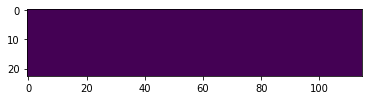

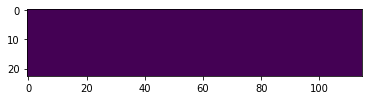

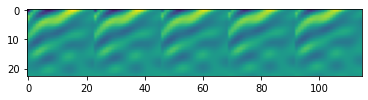

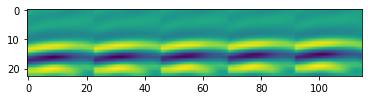

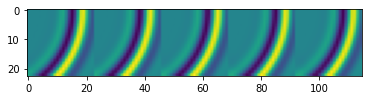

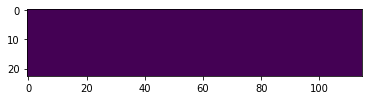

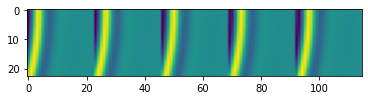

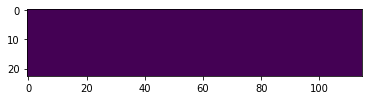

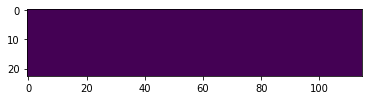

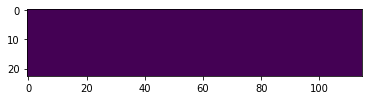

In [3]:
#Load array containing all images
images_list = np.load('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/images/images_list.npz')
images = images_list['a']
print(images.shape)

# for image in range (0, len(images), 5000):
for image in range (50000, 70000, 2000):
  plt.imshow(images[image])
  plt.show()

(87980, 11, 1)


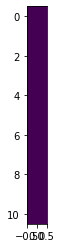

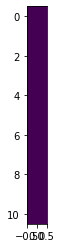

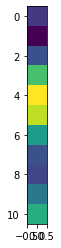

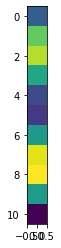

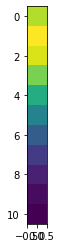

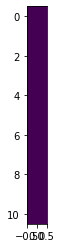

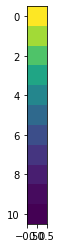

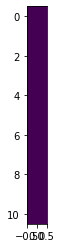

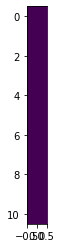

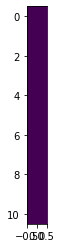

In [4]:
#Load array containing all labels
labels_list = np.load('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/labels/labels_list.npz')
labels = labels_list['a']
print(labels.shape)

# for i in range (0, len(labels), 5000):
for i in range (50000, 70000, 2000):
  plt.imshow(labels[i])
  plt.show()

#**Normalise**

**Find min and max of images and labels**

In [5]:
# Find min of inputs and labels
def find_min(inputs):
  overall_min = 1e31
  for i in inputs:
      input_min = np.min(i)
      if input_min < overall_min:
        overall_min = input_min

  return overall_min

min_inputs = np.min(images)  # Because they are numpy arrays, instead of a list of numpy arrays, you can calculate the min directly like this
min_labels = np.min(labels)
print(min_inputs, min_labels)

# Find overall min
min_inputs, min_labels
final_min = min(min_inputs, min_labels)
print(final_min)



# # No need for the above
# final_min = min(np.min(images), np.min(labels))


-6.8165285e-08 -3.4535958e-08
-6.8165285e-08


In [6]:
# Find max of inputs and labels
def find_max(inputs):
    overall_max = -1e31
    for i in inputs:
        input_max = np.max(i)
        if input_max > overall_max:
          overall_max = input_max

    return overall_max

max_inputs = np.max(images)
max_labels = np.max(labels)
print(max_inputs, max_labels)

# Find overall max
max_inputs, max_labels
final_max = max(max_inputs, max_labels)
print(final_max)


# # No need for the above
# final_max = max(np.max(images), np.max(labels))


8.9908e-08 4.9094876e-08
8.9908e-08


**Normalise data**

In [7]:
norm_inputs = 2 * (images - final_min) / (final_max - final_min) - 1
print(norm_inputs.shape)
print(np.min(norm_inputs), np.max(norm_inputs))

(87980, 23, 115)
-1.0 1.0


In [8]:
norm_labels = 2 * (labels - final_min) / (final_max - final_min) - 1 #using overall min/max
print(norm_labels.shape)
print(np.min(norm_labels), np.max(norm_labels))

(87980, 11, 1)
-0.5745096 0.48361766


Datapiece 0


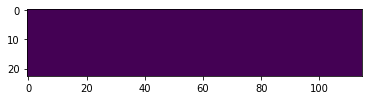

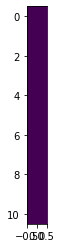

Datapiece 1000


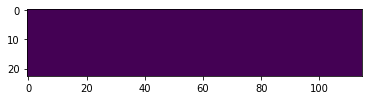

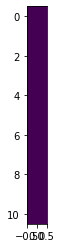

Datapiece 2000


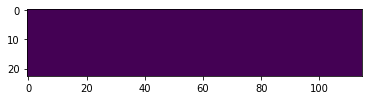

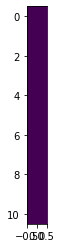

Datapiece 3000


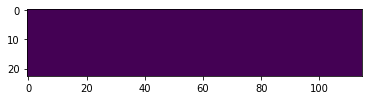

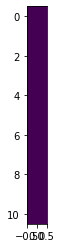

Datapiece 4000


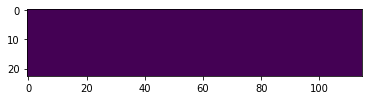

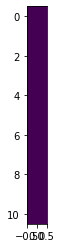

Datapiece 5000


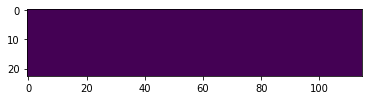

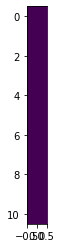

Datapiece 6000


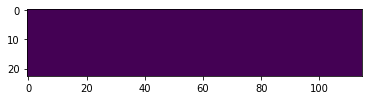

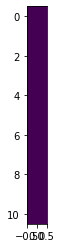

Datapiece 7000


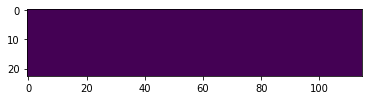

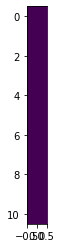

Datapiece 8000


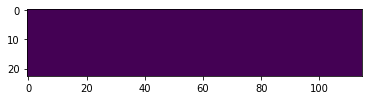

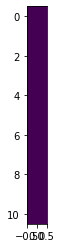

Datapiece 9000


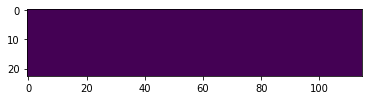

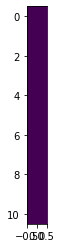

Datapiece 10000


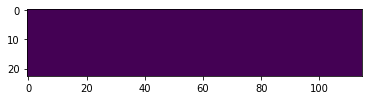

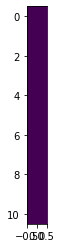

Datapiece 11000


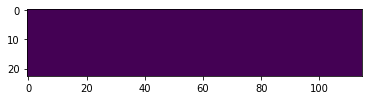

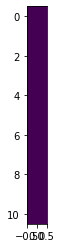

Datapiece 12000


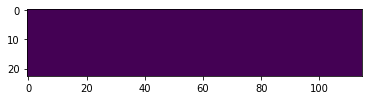

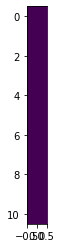

Datapiece 13000


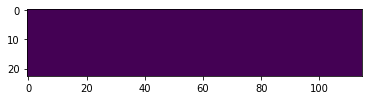

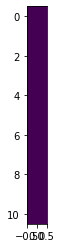

Datapiece 14000


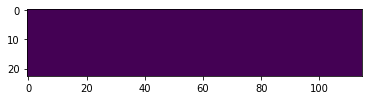

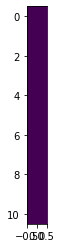

Datapiece 15000


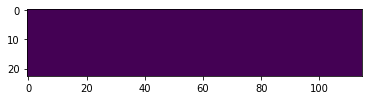

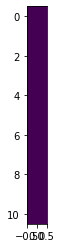

Datapiece 16000


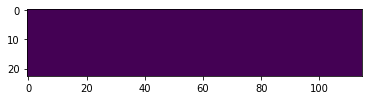

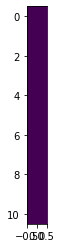

Datapiece 17000


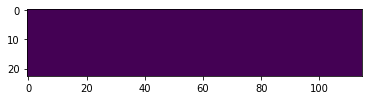

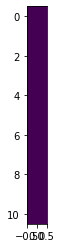

Datapiece 18000


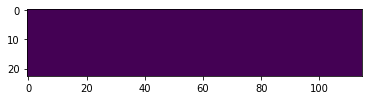

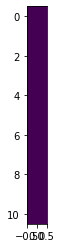

Datapiece 19000


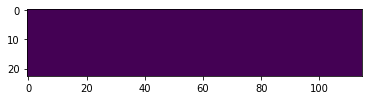

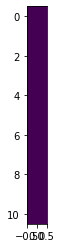

Datapiece 20000


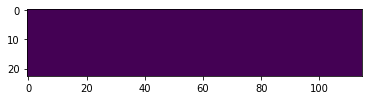

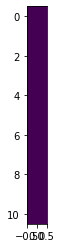

Datapiece 21000


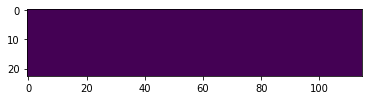

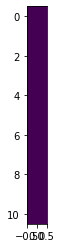

Datapiece 22000


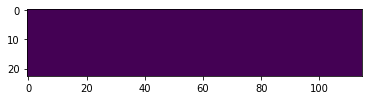

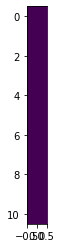

Datapiece 23000


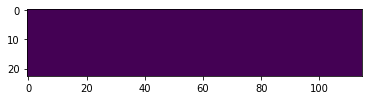

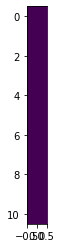

Datapiece 24000


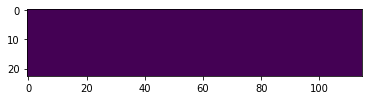

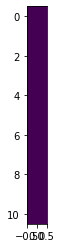

Datapiece 25000


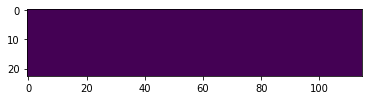

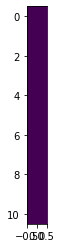

Datapiece 26000


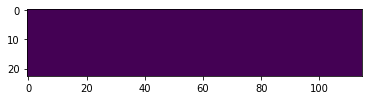

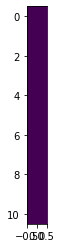

Datapiece 27000


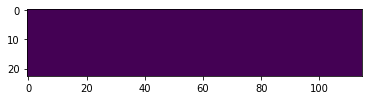

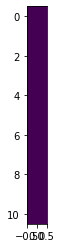

Datapiece 28000


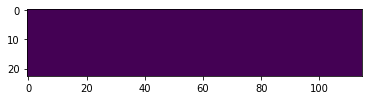

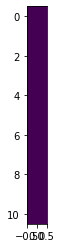

Datapiece 29000


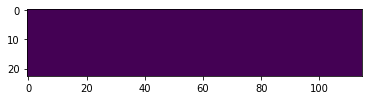

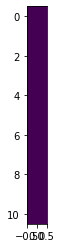

Datapiece 30000


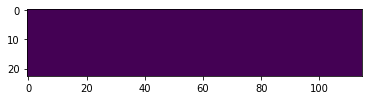

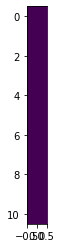

Datapiece 31000


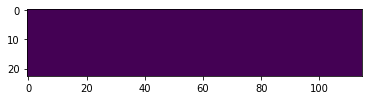

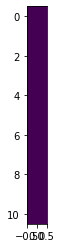

Datapiece 32000


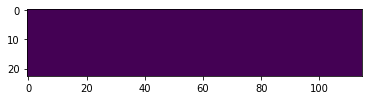

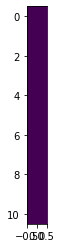

Datapiece 33000


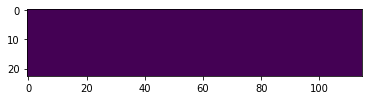

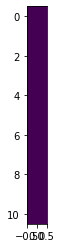

Datapiece 34000


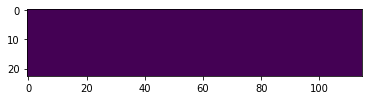

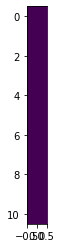

Datapiece 35000


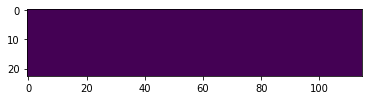

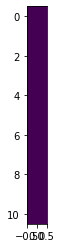

Datapiece 36000


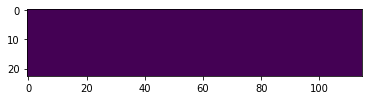

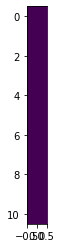

Datapiece 37000


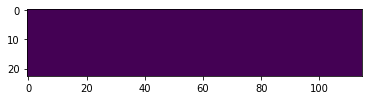

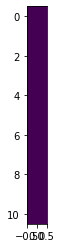

Datapiece 38000


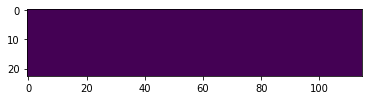

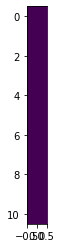

Datapiece 39000


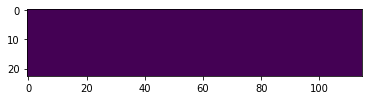

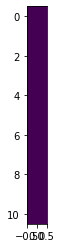

Datapiece 40000


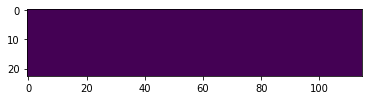

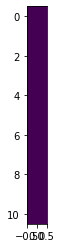

Datapiece 41000


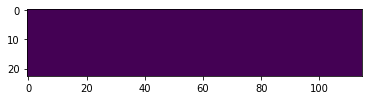

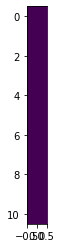

Datapiece 42000


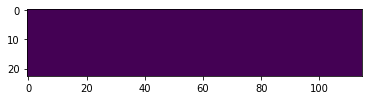

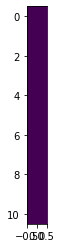

Datapiece 43000


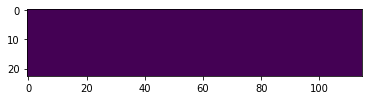

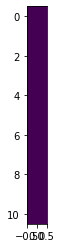

Datapiece 44000


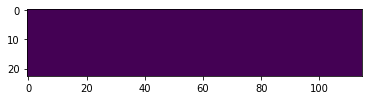

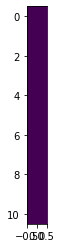

Datapiece 45000


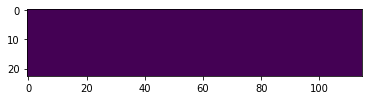

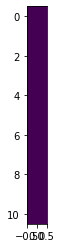

Datapiece 46000


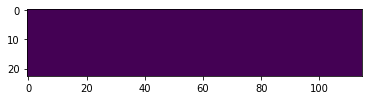

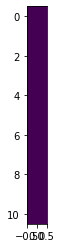

Datapiece 47000


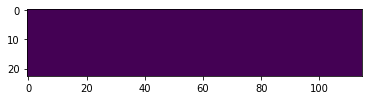

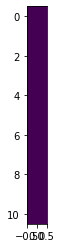

Datapiece 48000


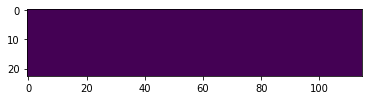

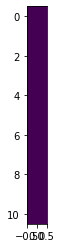

Datapiece 49000


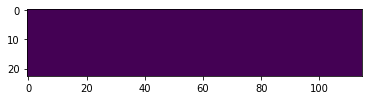

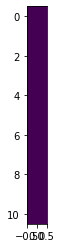

Datapiece 50000


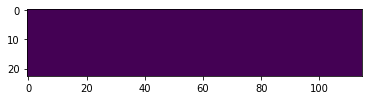

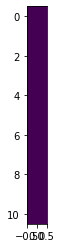

Datapiece 51000


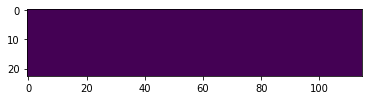

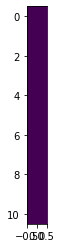

Datapiece 52000


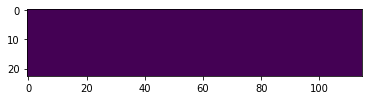

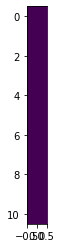

Datapiece 53000


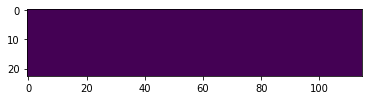

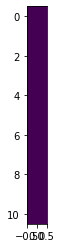

Datapiece 54000


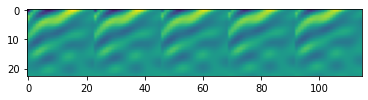

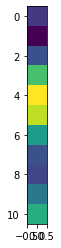

Datapiece 55000


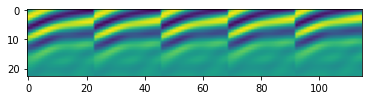

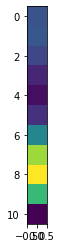

Datapiece 56000


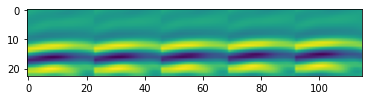

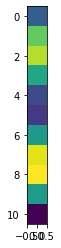

Datapiece 57000


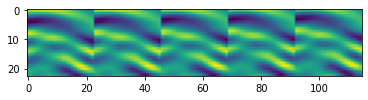

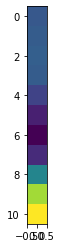

Datapiece 58000


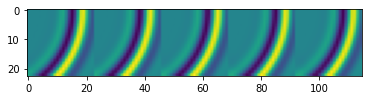

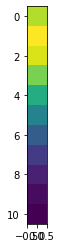

Datapiece 59000


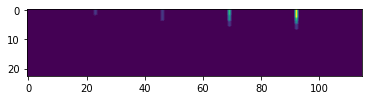

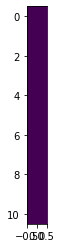

Datapiece 60000


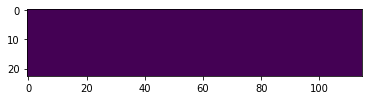

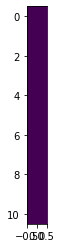

Datapiece 61000


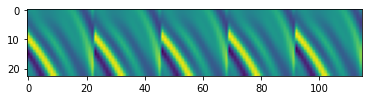

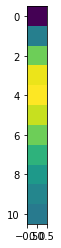

Datapiece 62000


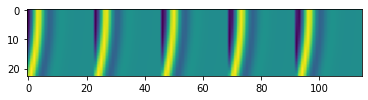

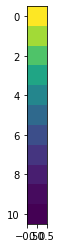

Datapiece 63000


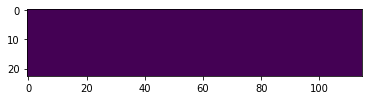

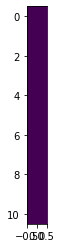

Datapiece 64000


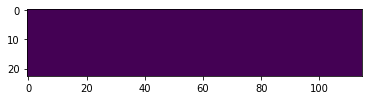

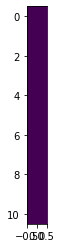

Datapiece 65000


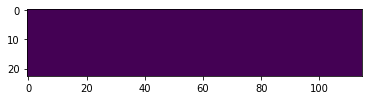

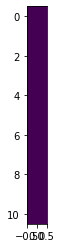

Datapiece 66000


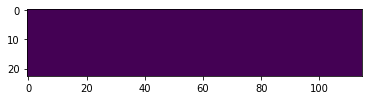

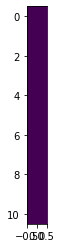

Datapiece 67000


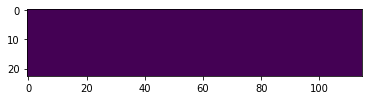

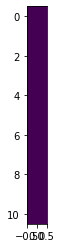

Datapiece 68000


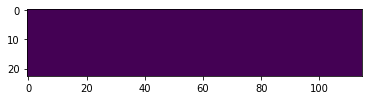

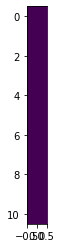

Datapiece 69000


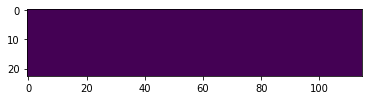

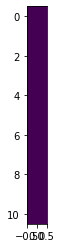

Datapiece 70000


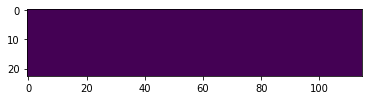

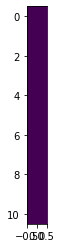

Datapiece 71000


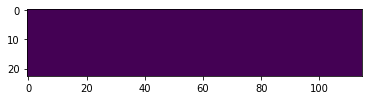

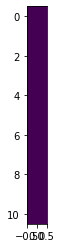

Datapiece 72000


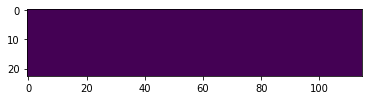

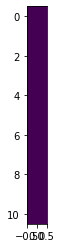

Datapiece 73000


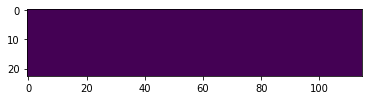

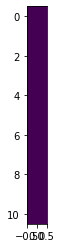

Datapiece 74000


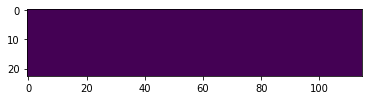

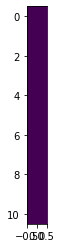

Datapiece 75000


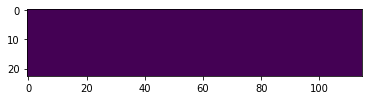

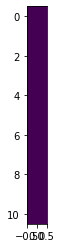

Datapiece 76000


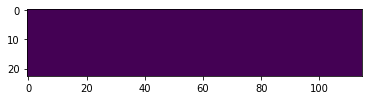

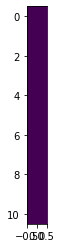

Datapiece 77000


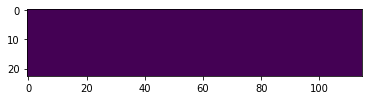

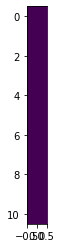

Datapiece 78000


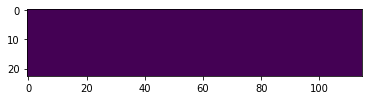

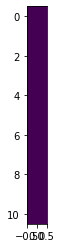

Datapiece 79000


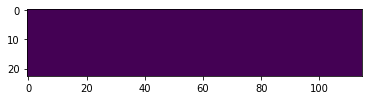

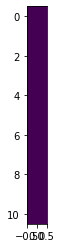

Datapiece 80000


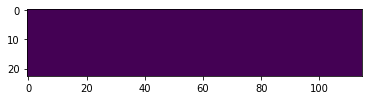

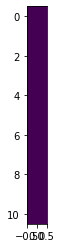

Datapiece 81000


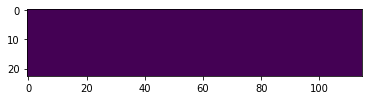

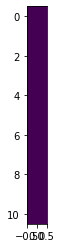

Datapiece 82000


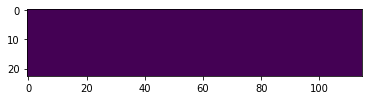

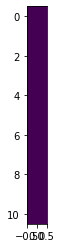

Datapiece 83000


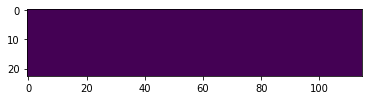

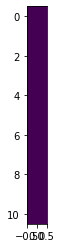

Datapiece 84000


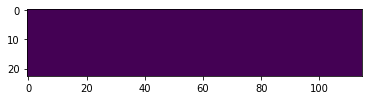

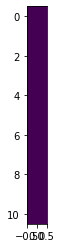

Datapiece 85000


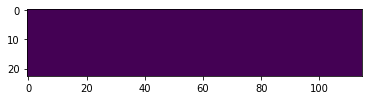

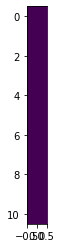

Datapiece 86000


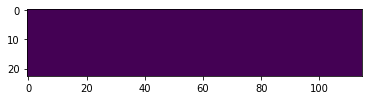

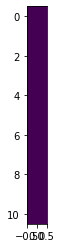

Datapiece 87000


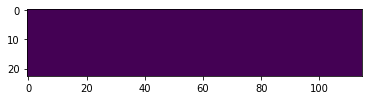

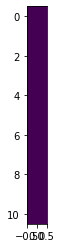

In [ ]:
for i in range (0, 87980, 1000): 
  print('Datapiece ' + str(i))
  pyplot.imshow(norm_inputs[i])
  pyplot.show()
  pyplot.imshow(norm_labels[i])
  pyplot.show()

In [9]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/norm_inputs', norm_inputs)

In [10]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/norm_labels', norm_labels)

**Save 2 arrays into an array**

In [11]:
dataset = list(zip(norm_inputs, norm_labels))
dataset = np.asarray(dataset)

In [12]:
print(dataset.shape)

(87980, 2)


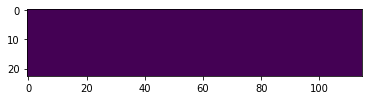

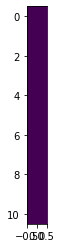

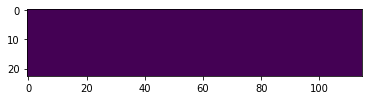

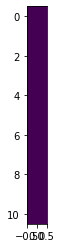

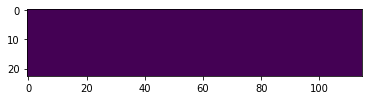

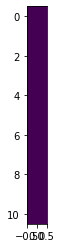

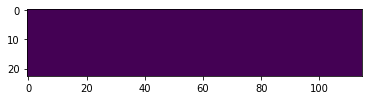

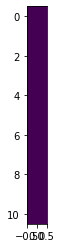

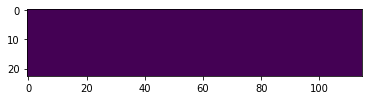

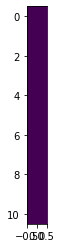

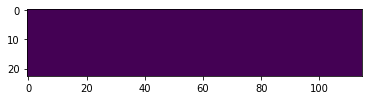

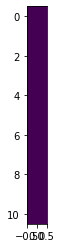

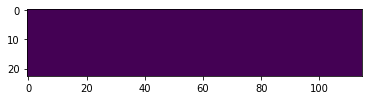

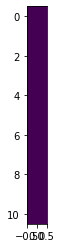

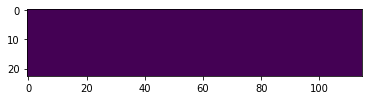

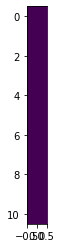

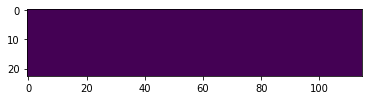

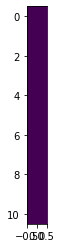

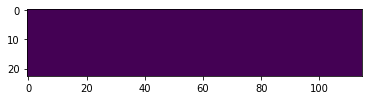

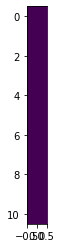

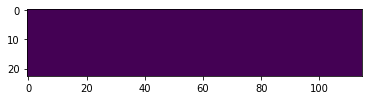

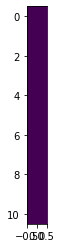

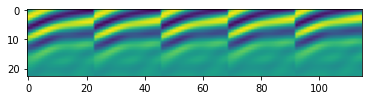

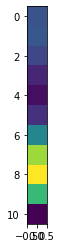

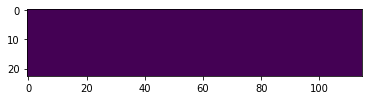

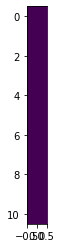

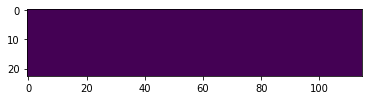

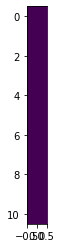

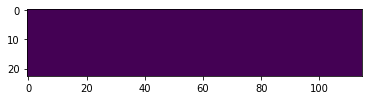

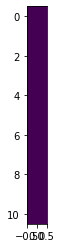

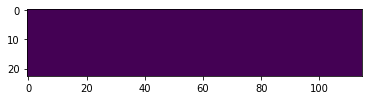

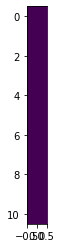

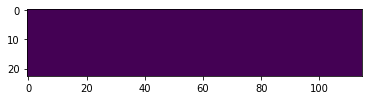

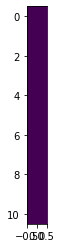

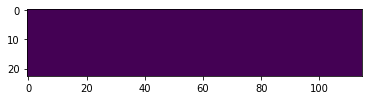

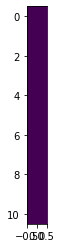

In [ ]:
for i in range (0, len(dataset), 5000):
  plt.imshow(dataset[i][0])
  plt.show()
  plt.imshow(dataset[i][1])
  plt.show()

**Split Normalised Data into training, val, test sets**

In [ ]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(dataset)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(dataset)

random.shuffle(dataset)

for samples, labels in dataset:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(70384, 2)
(10998, 2)
(6598, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/norm_training_data', training_data)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/norm_val_data', val_data)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/norm_test_data', test_data)

In [ ]:
train_imgs = []
train_labs = []

for i in range (0, 70384, 1):
  train_imgs.append(training_data[i][0])
  train_labs.append(training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(70384, 23, 115)
(70384, 11, 1)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/norm_training_dataset', train_imgs, train_labs)

#**Check which data is solid/wave**

In [ ]:
print(np.min(train_imgs))

-1.0


Datapiece53000


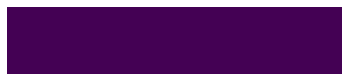

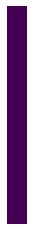

Datapiece53100


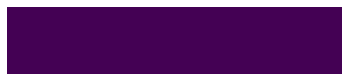

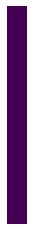

Datapiece53200


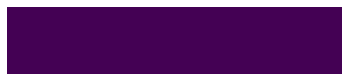

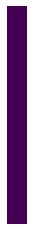

Datapiece53300


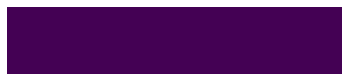

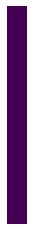

Datapiece53400


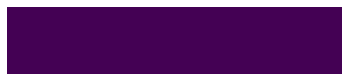

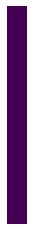

Datapiece53500


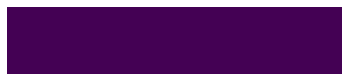

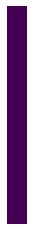

Datapiece53600


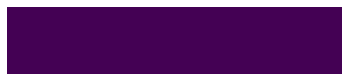

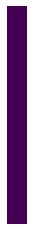

Datapiece53700


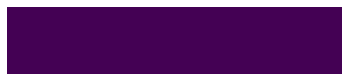

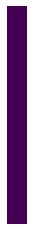

Datapiece53800


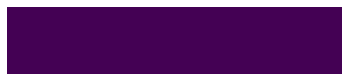

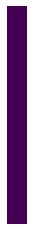

Datapiece53900


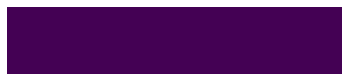

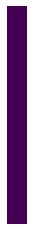

Datapiece54000


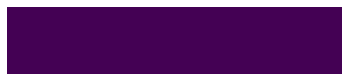

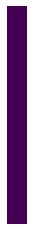

Datapiece54100


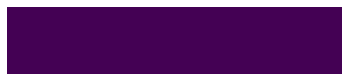

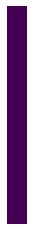

Datapiece54200


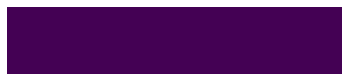

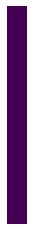

Datapiece54300


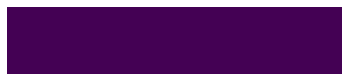

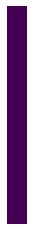

Datapiece54400


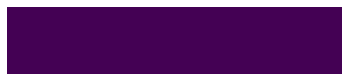

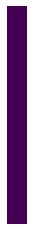

Datapiece54500


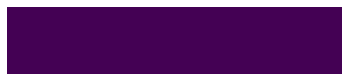

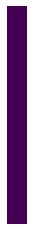

Datapiece54600


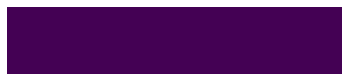

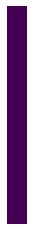

Datapiece54700


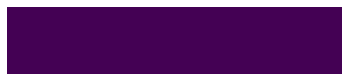

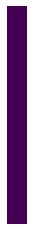

Datapiece54800


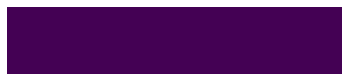

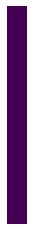

Datapiece54900


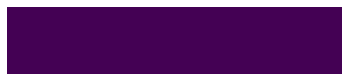

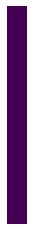

Datapiece55000


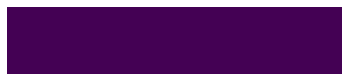

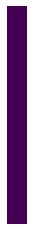

Datapiece55100


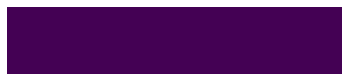

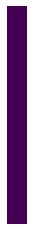

Datapiece55200


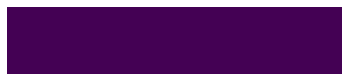

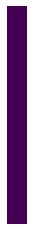

Datapiece55300


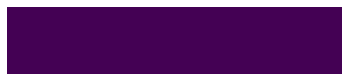

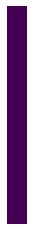

Datapiece55400


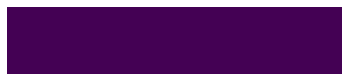

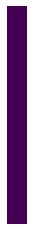

Datapiece55500


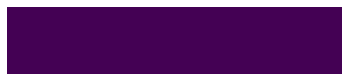

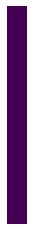

Datapiece55600


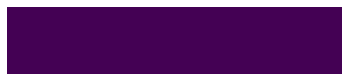

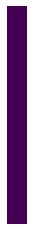

Datapiece55700


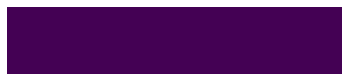

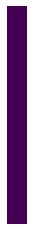

Datapiece55800


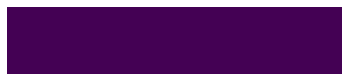

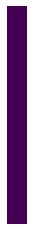

Datapiece55900


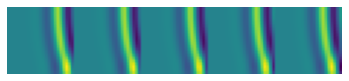

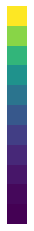

Datapiece56000


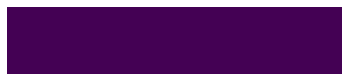

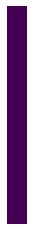

Datapiece56100


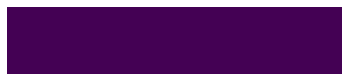

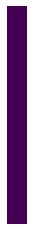

Datapiece56200


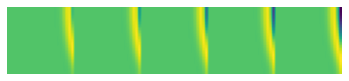

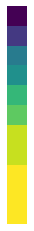

Datapiece56300


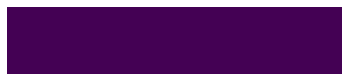

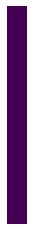

Datapiece56400


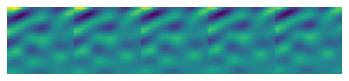

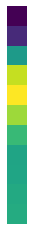

Datapiece56500


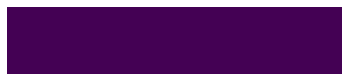

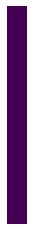

Datapiece56600


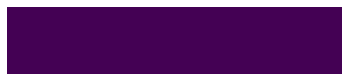

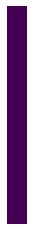

Datapiece56700


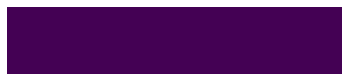

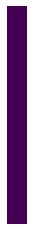

Datapiece56800


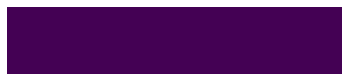

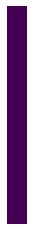

Datapiece56900


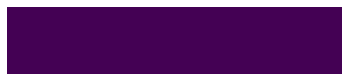

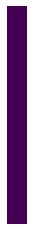

Datapiece57000


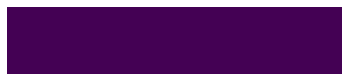

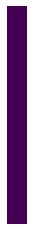

Datapiece57100


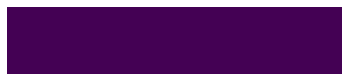

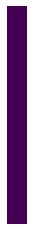

Datapiece57200


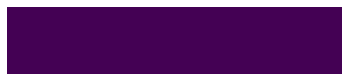

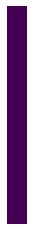

Datapiece57300


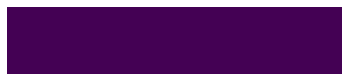

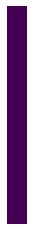

Datapiece57400


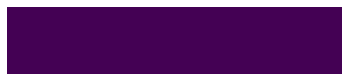

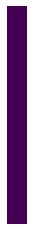

Datapiece57500


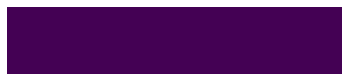

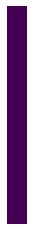

Datapiece57600


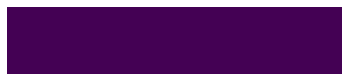

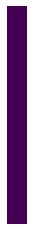

Datapiece57700


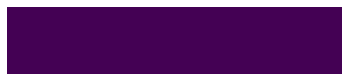

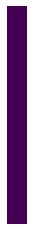

Datapiece57800


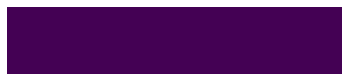

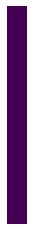

Datapiece57900


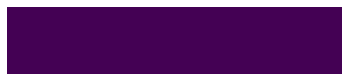

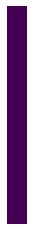

Datapiece58000


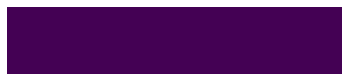

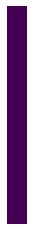

Datapiece58100


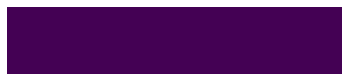

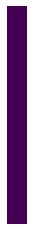

Datapiece58200


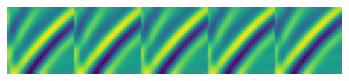

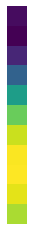

Datapiece58300


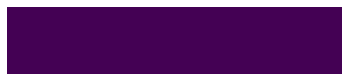

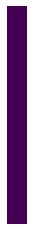

Datapiece58400


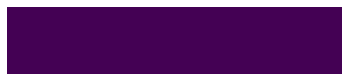

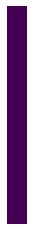

Datapiece58500


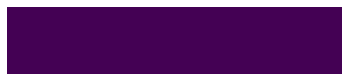

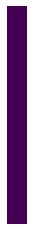

Datapiece58600


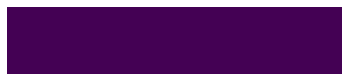

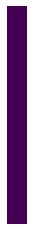

Datapiece58700


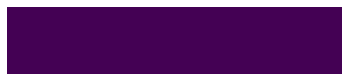

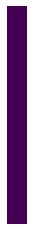

Datapiece58800


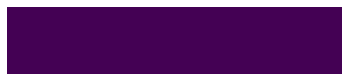

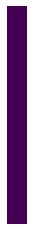

Datapiece58900


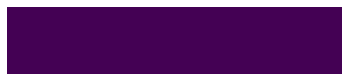

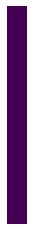

Datapiece59000


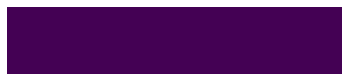

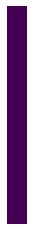

Datapiece59100


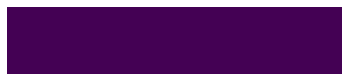

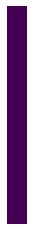

Datapiece59200


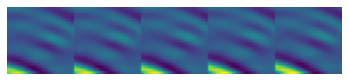

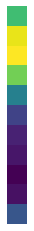

Datapiece59300


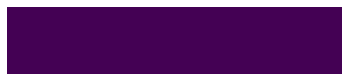

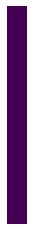

Datapiece59400


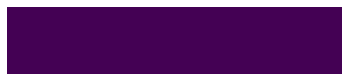

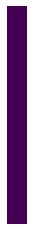

Datapiece59500


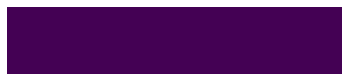

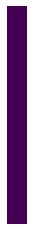

Datapiece59600


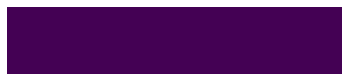

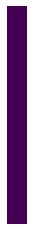

Datapiece59700


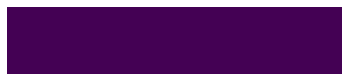

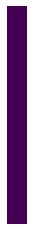

Datapiece59800


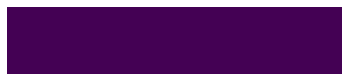

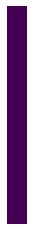

Datapiece59900


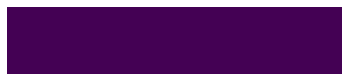

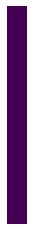

Datapiece60000


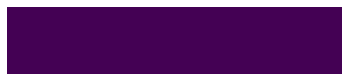

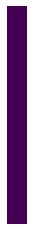

Datapiece60100


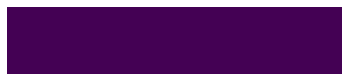

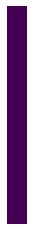

Datapiece60200


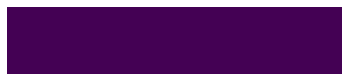

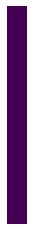

Datapiece60300


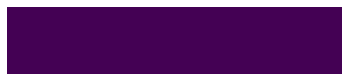

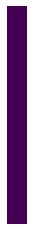

Datapiece60400


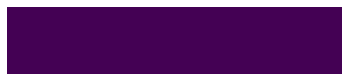

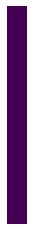

Datapiece60500


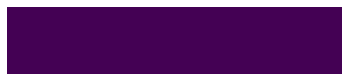

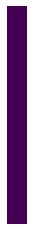

Datapiece60600


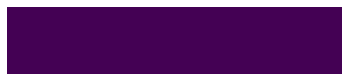

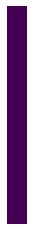

Datapiece60700


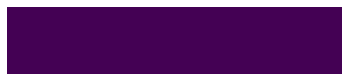

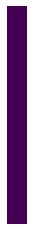

Datapiece60800


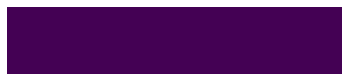

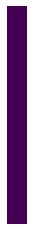

Datapiece60900


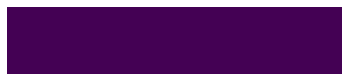

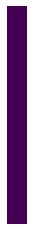

Datapiece61000


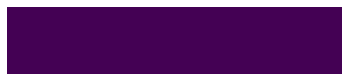

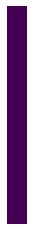

Datapiece61100


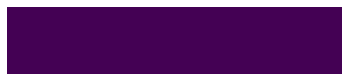

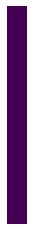

Datapiece61200


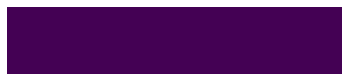

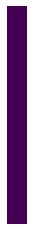

Datapiece61300


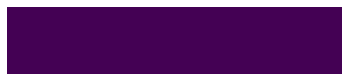

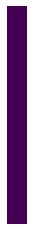

Datapiece61400


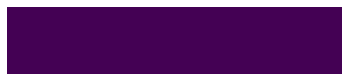

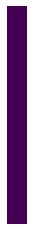

Datapiece61500


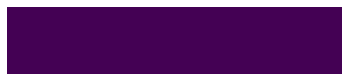

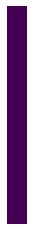

Datapiece61600


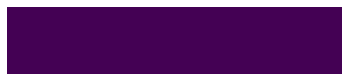

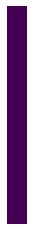

Datapiece61700


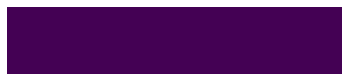

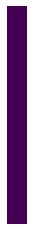

Datapiece61800


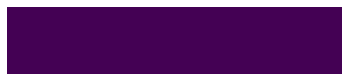

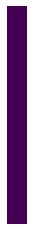

Datapiece61900


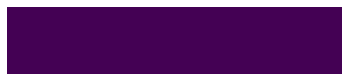

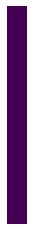

Datapiece62000


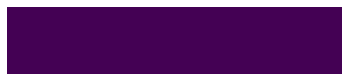

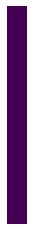

Datapiece62100


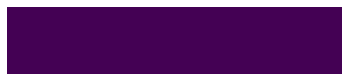

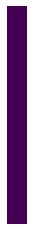

Datapiece62200


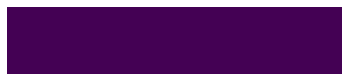

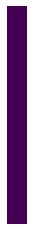

Datapiece62300


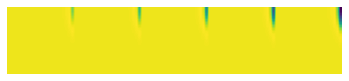

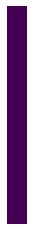

Datapiece62400


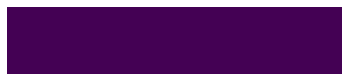

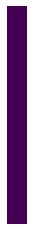

Datapiece62500


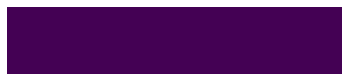

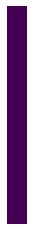

Datapiece62600


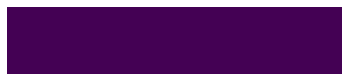

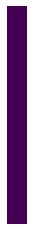

Datapiece62700


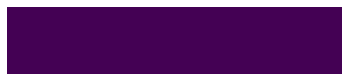

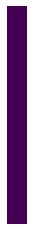

Datapiece62800


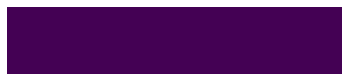

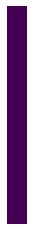

Datapiece62900


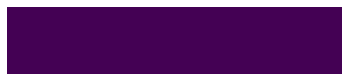

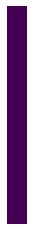

In [ ]:
for i in range (53000, 63000, 100):
  print('Datapiece' + str(i))
  plt.axis('off')
  plt.imshow(dataset[i][0])
  plt.show()
  plt.axis('off')
  plt.imshow(dataset[i][1])
  plt.show()

#**Split into Debias Arrays 50/50 Split**

**Split into new arrays for 50% solid 50% wave data**

In [ ]:
#87980 data pieces (75% solid = 65985 , 25% wave = 21995)
# Aim to have 50% solid, 50% wave so 21995 of each, get rid of 2/3 of solid stuff
# Solid resides everywhere except 43991-65985 range!
# 0-21995, 21996-43990, 43991-65985, 65986-87980

#NOTE: even in the range where the wave images are supposed to be, not all are waves

In [ ]:
# Take data from 21996 to 65985 of dataset
debias_norm_dataset1 = dataset[21996:65985]
print(debias_norm_dataset1.shape)

(43989, 2)


**Split into train and test and validation data**



In [ ]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(debias_norm_dataset1)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(debias_norm_dataset1)

random.shuffle(debias_norm_dataset1)

for samples, labels in debias_norm_dataset1:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(35192, 2)
(5498, 2)
(3299, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/debias_norm_training_data1', training_data)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/debias_norm_val_data1', val_data)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/debias_norm_test_data1', test_data)

In [ ]:
train_imgs = []
train_labs = []

for i in range (0, 35192, 1):
  train_imgs.append(training_data[i][0])
  train_labs.append(training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(35192, 23, 115)
(35192, 11, 1)


In [ ]:
print(np.min(train_imgs))

-0.13754827


Datapiece1


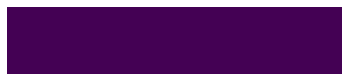

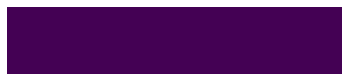

Datapiece151


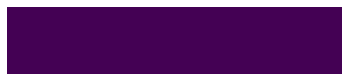

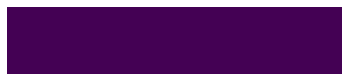

Datapiece301


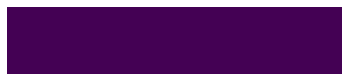

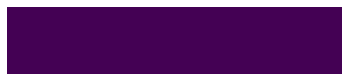

Datapiece451


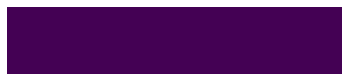

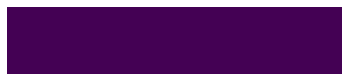

Datapiece601


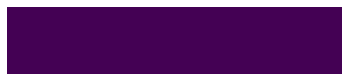

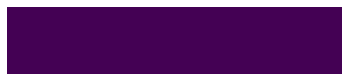

Datapiece751


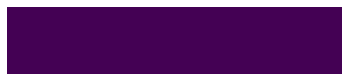

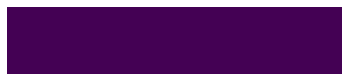

Datapiece901


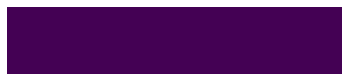

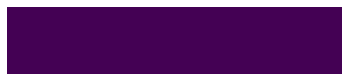

Datapiece1051


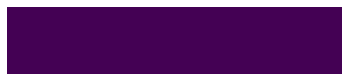

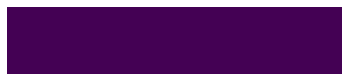

Datapiece1201


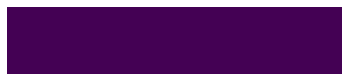

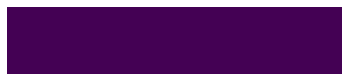

Datapiece1351


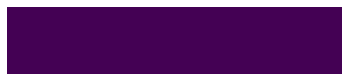

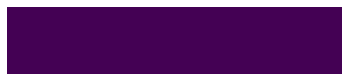

Datapiece1501


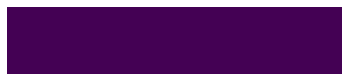

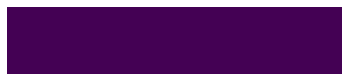

Datapiece1651


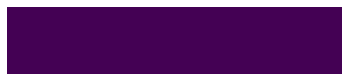

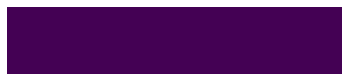

Datapiece1801


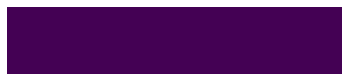

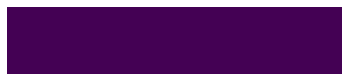

Datapiece1951


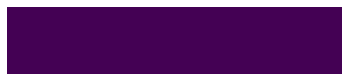

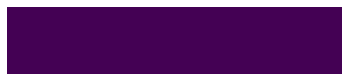

Datapiece2101


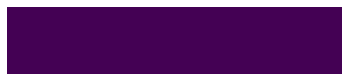

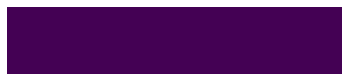

Datapiece2251


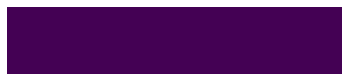

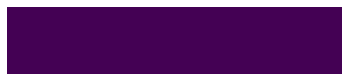

Datapiece2401


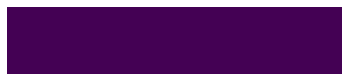

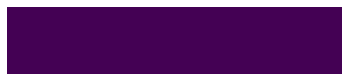

Datapiece2551


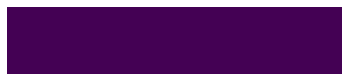

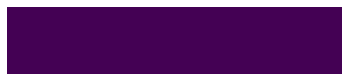

Datapiece2701


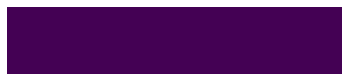

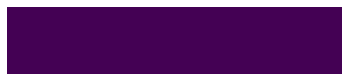

Datapiece2851


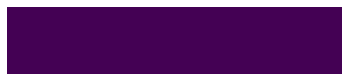

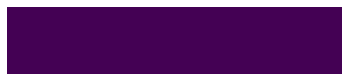

Datapiece3001


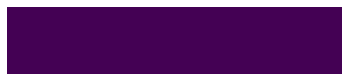

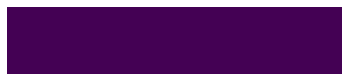

Datapiece3151


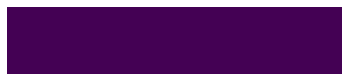

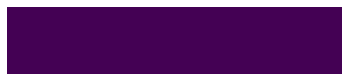

Datapiece3301


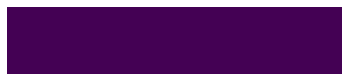

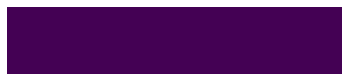

Datapiece3451


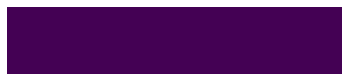

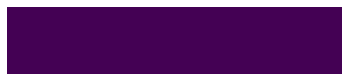

Datapiece3601


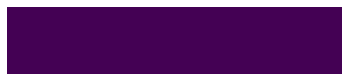

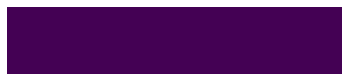

Datapiece3751


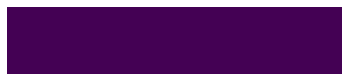

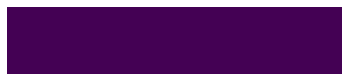

Datapiece3901


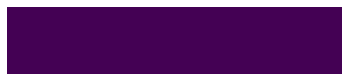

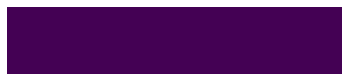

Datapiece4051


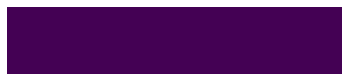

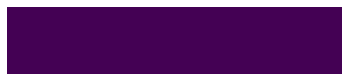

Datapiece4201


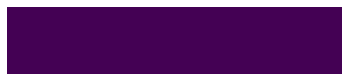

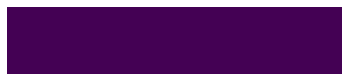

Datapiece4351


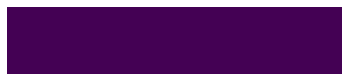

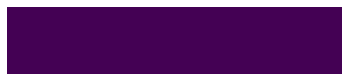

Datapiece4501


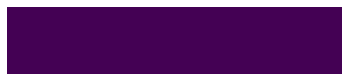

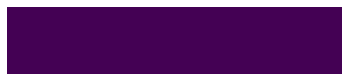

Datapiece4651


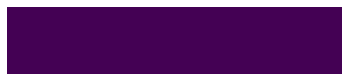

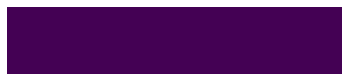

Datapiece4801


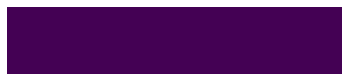

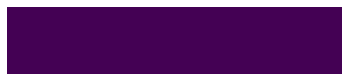

Datapiece4951


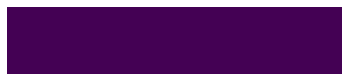

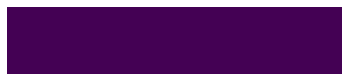

Datapiece5101


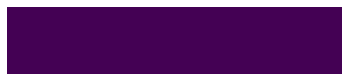

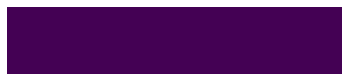

Datapiece5251


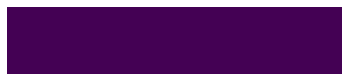

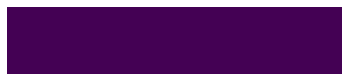

Datapiece5401


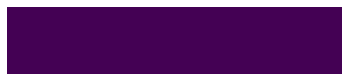

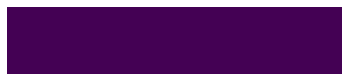

Datapiece5551


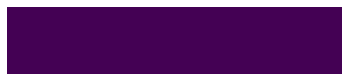

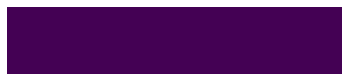

Datapiece5701


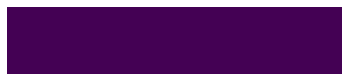

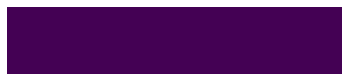

Datapiece5851


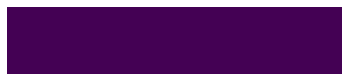

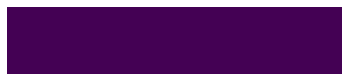

Datapiece6001


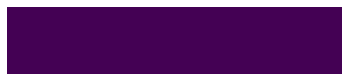

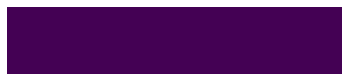

Datapiece6151


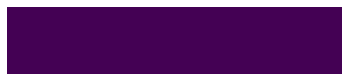

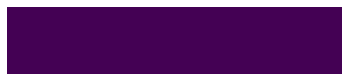

Datapiece6301


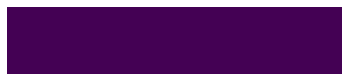

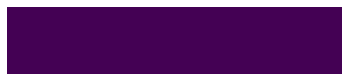

Datapiece6451


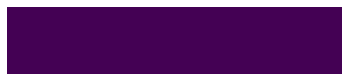

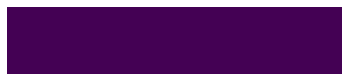

Datapiece6601


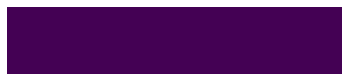

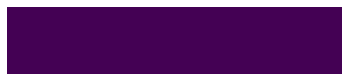

Datapiece6751


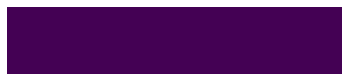

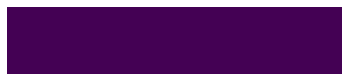

Datapiece6901


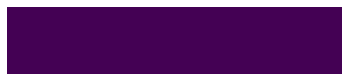

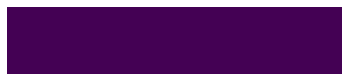

Datapiece7051


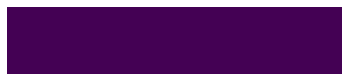

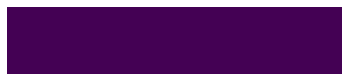

Datapiece7201


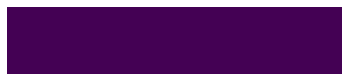

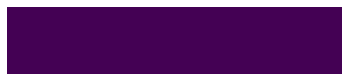

Datapiece7351


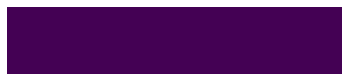

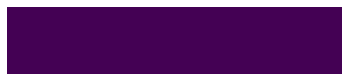

Datapiece7501


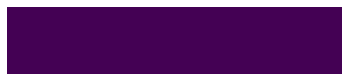

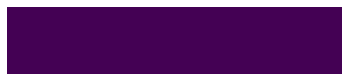

Datapiece7651


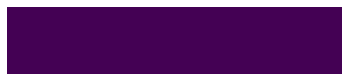

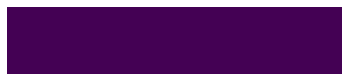

Datapiece7801


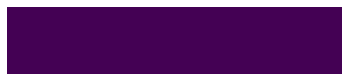

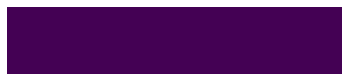

Datapiece7951


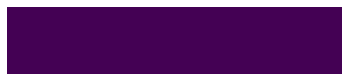

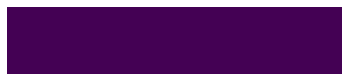

Datapiece8101


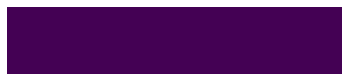

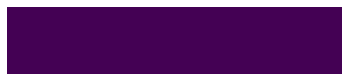

Datapiece8251


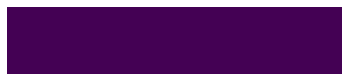

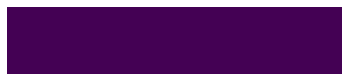

Datapiece8401


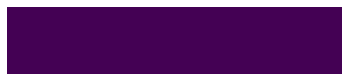

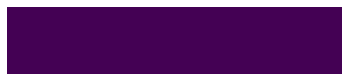

Datapiece8551


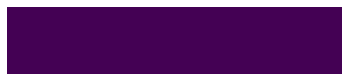

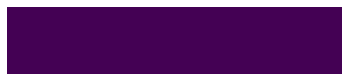

Datapiece8701


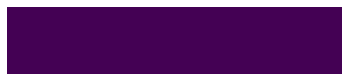

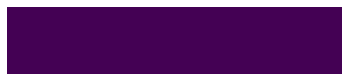

Datapiece8851


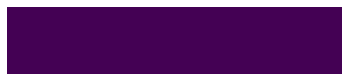

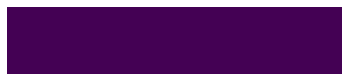

Datapiece9001


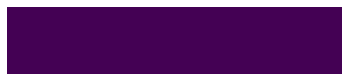

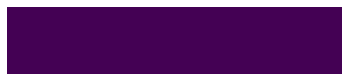

Datapiece9151


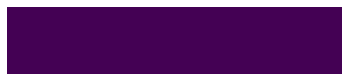

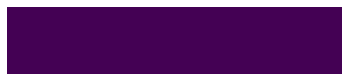

Datapiece9301


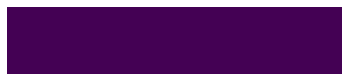

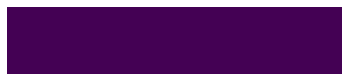

Datapiece9451


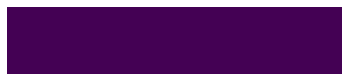

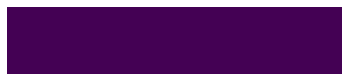

Datapiece9601


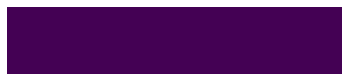

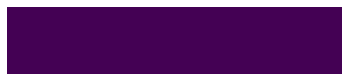

Datapiece9751


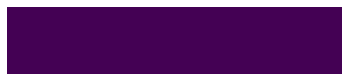

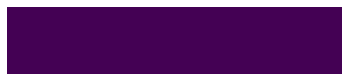

Datapiece9901


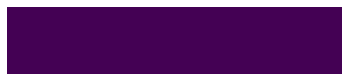

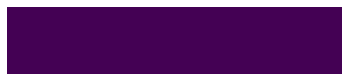

Datapiece10051


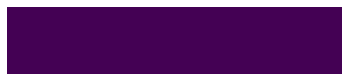

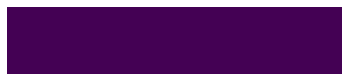

Datapiece10201


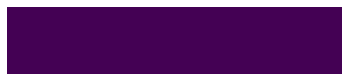

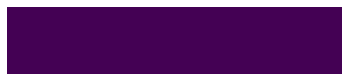

Datapiece10351


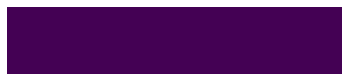

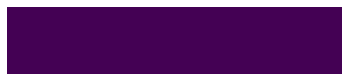

Datapiece10501


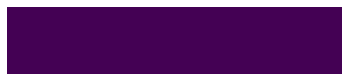

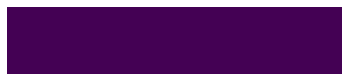

Datapiece10651


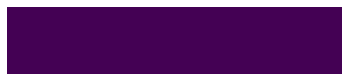

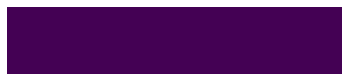

Datapiece10801


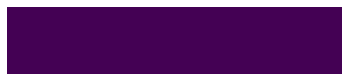

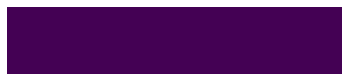

Datapiece10951


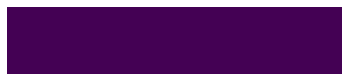

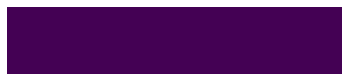

Datapiece11101


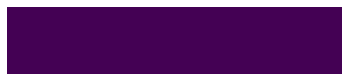

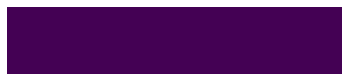

Datapiece11251


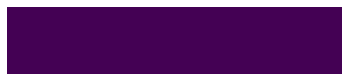

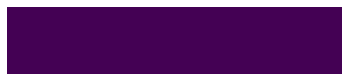

Datapiece11401


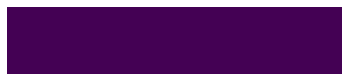

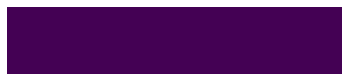

Datapiece11551


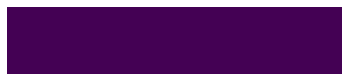

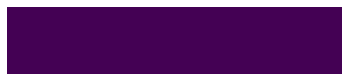

Datapiece11701


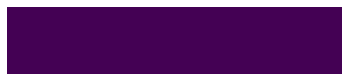

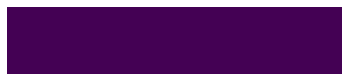

Datapiece11851


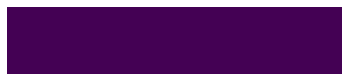

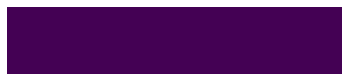

Datapiece12001


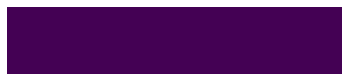

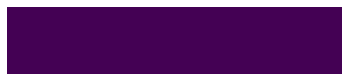

Datapiece12151


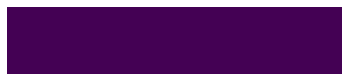

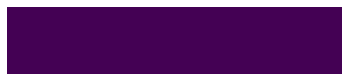

Datapiece12301


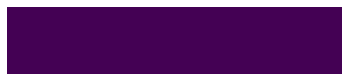

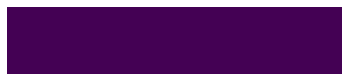

Datapiece12451


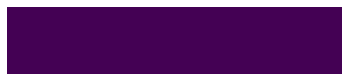

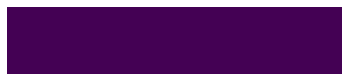

Datapiece12601


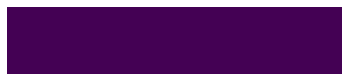

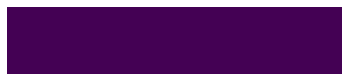

Datapiece12751


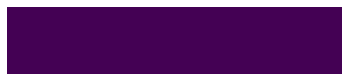

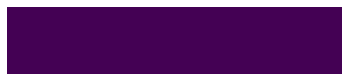

Datapiece12901


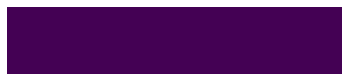

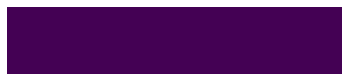

Datapiece13051


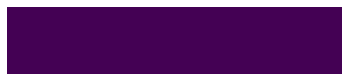

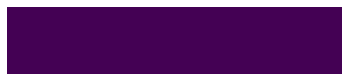

Datapiece13201


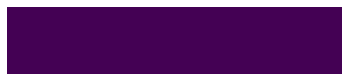

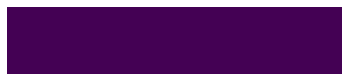

Datapiece13351


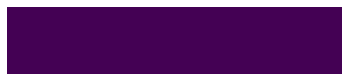

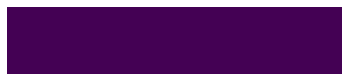

Datapiece13501


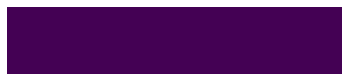

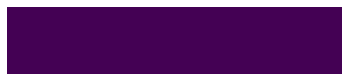

Datapiece13651


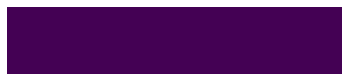

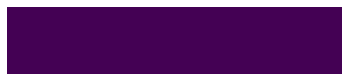

Datapiece13801


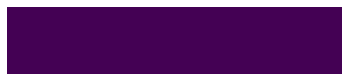

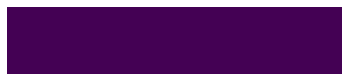

Datapiece13951


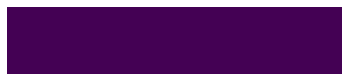

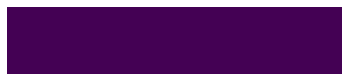

Datapiece14101


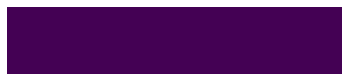

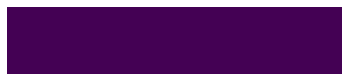

Datapiece14251


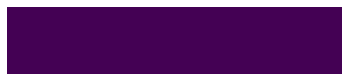

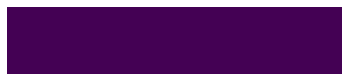

Datapiece14401


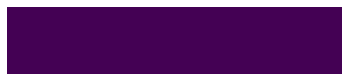

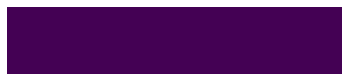

Datapiece14551


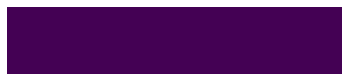

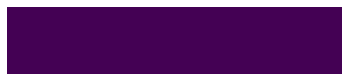

Datapiece14701


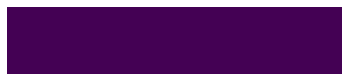

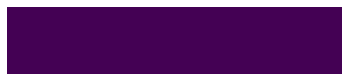

Datapiece14851


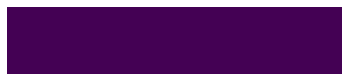

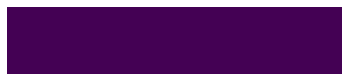

Datapiece15001


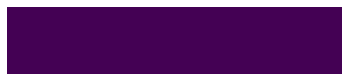

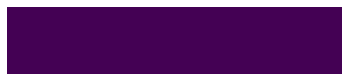

Datapiece15151


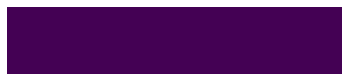

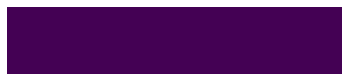

Datapiece15301


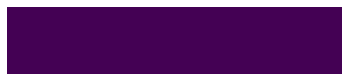

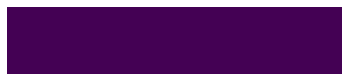

Datapiece15451


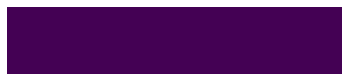

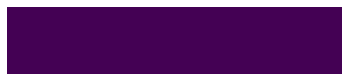

Datapiece15601


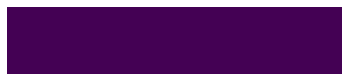

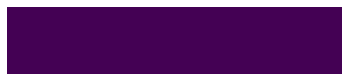

Datapiece15751


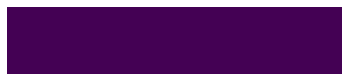

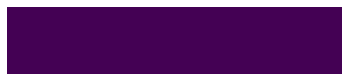

Datapiece15901


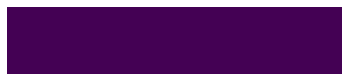

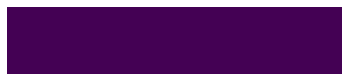

Datapiece16051


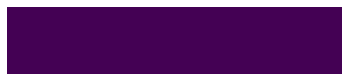

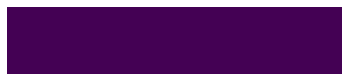

Datapiece16201


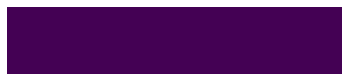

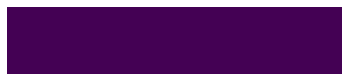

Datapiece16351


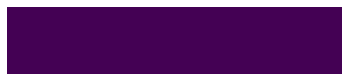

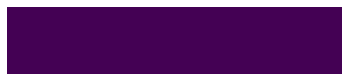

Datapiece16501


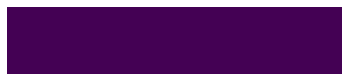

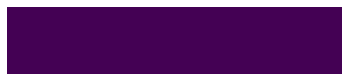

Datapiece16651


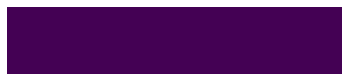

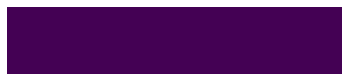

Datapiece16801


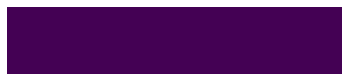

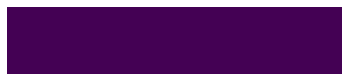

Datapiece16951


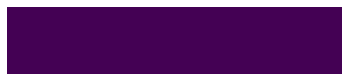

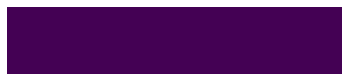

Datapiece17101


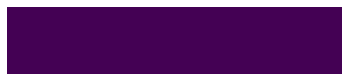

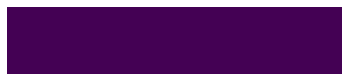

Datapiece17251


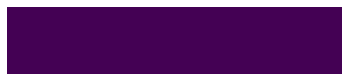

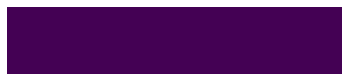

Datapiece17401


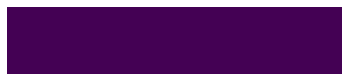

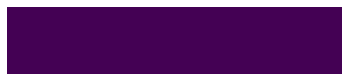

Datapiece17551


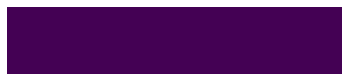

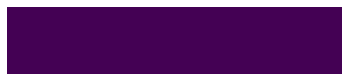

Datapiece17701


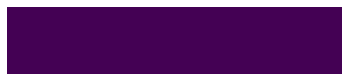

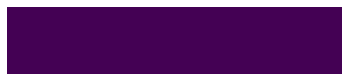

Datapiece17851


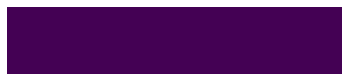

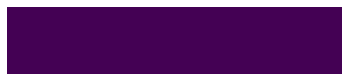

Datapiece18001


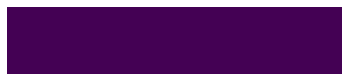

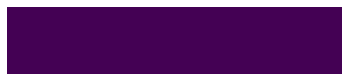

Datapiece18151


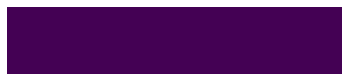

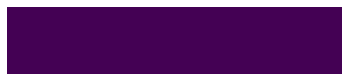

Datapiece18301


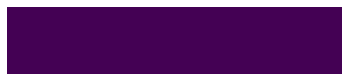

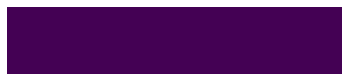

Datapiece18451


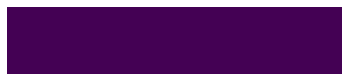

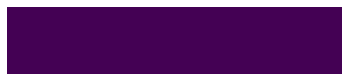

Datapiece18601


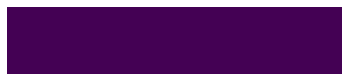

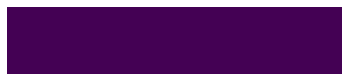

Datapiece18751


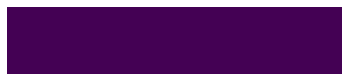

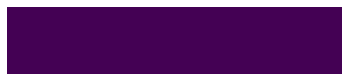

Datapiece18901


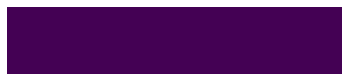

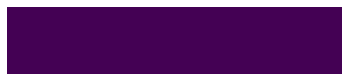

Datapiece19051


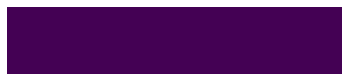

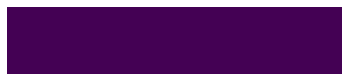

Datapiece19201


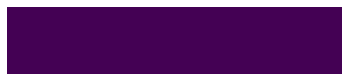

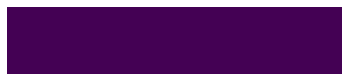

Datapiece19351


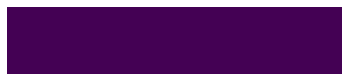

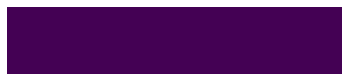

Datapiece19501


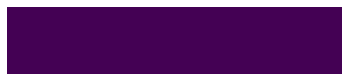

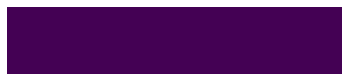

Datapiece19651


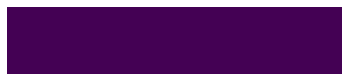

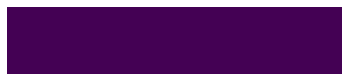

Datapiece19801


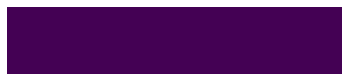

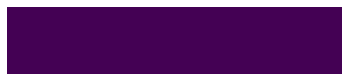

Datapiece19951


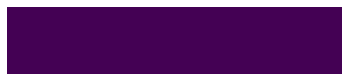

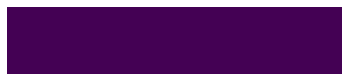

Datapiece20101


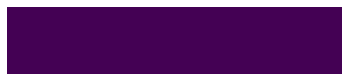

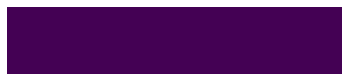

Datapiece20251


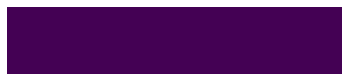

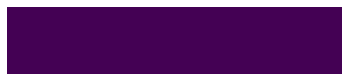

Datapiece20401


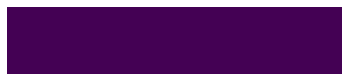

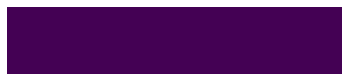

Datapiece20551


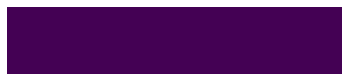

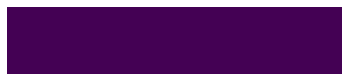

Datapiece20701


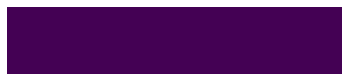

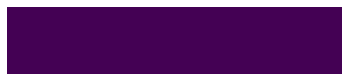

Datapiece20851


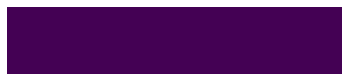

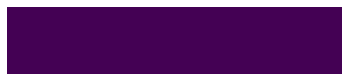

Datapiece21001


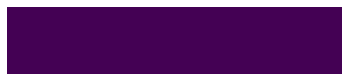

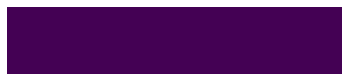

Datapiece21151


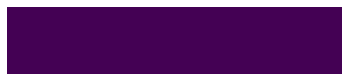

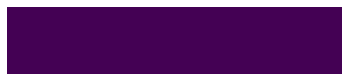

Datapiece21301


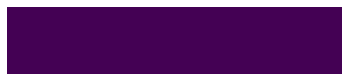

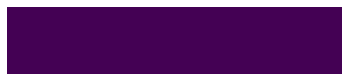

Datapiece21451


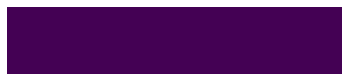

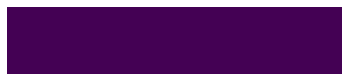

Datapiece21601


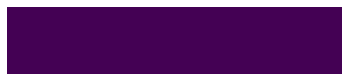

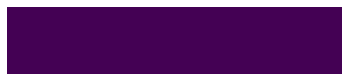

Datapiece21751


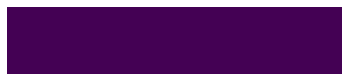

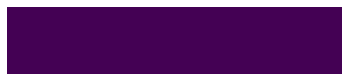

Datapiece21901


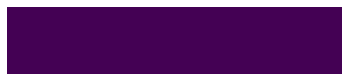

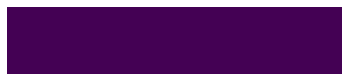

Datapiece22051


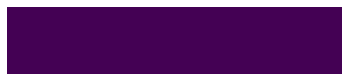

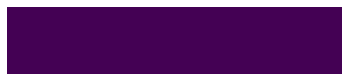

Datapiece22201


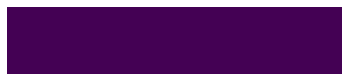

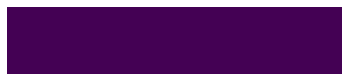

Datapiece22351


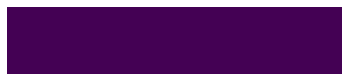

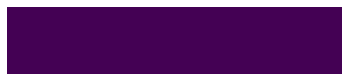

Datapiece22501


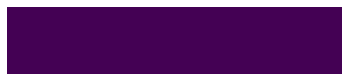

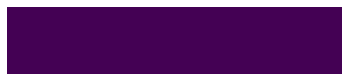

Datapiece22651


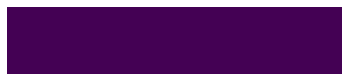

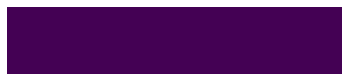

Datapiece22801


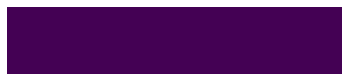

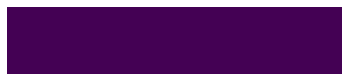

Datapiece22951


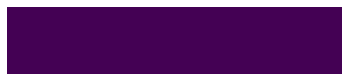

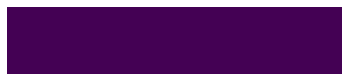

Datapiece23101


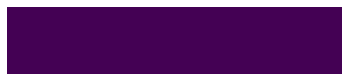

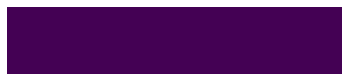

Datapiece23251


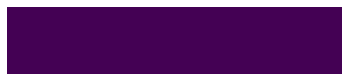

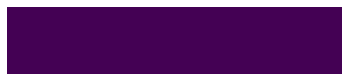

Datapiece23401


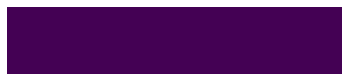

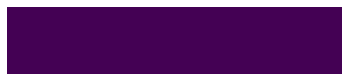

Datapiece23551


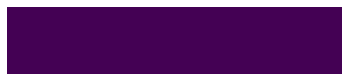

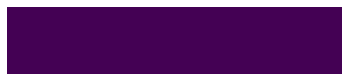

Datapiece23701


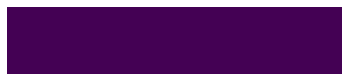

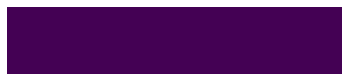

Datapiece23851


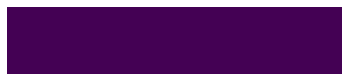

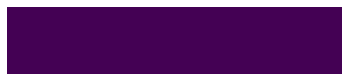

Datapiece24001


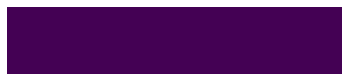

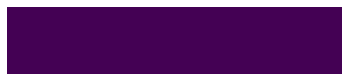

Datapiece24151


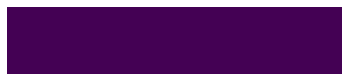

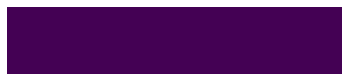

Datapiece24301


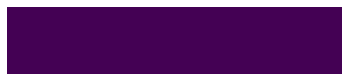

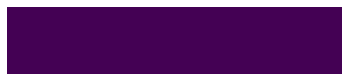

Datapiece24451


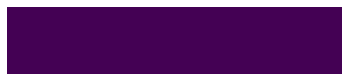

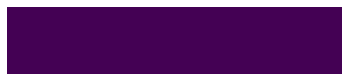

Datapiece24601


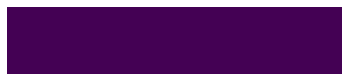

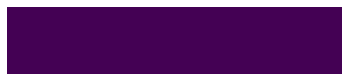

Datapiece24751


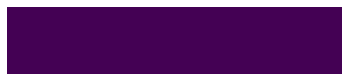

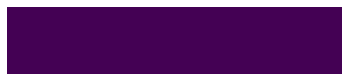

Datapiece24901


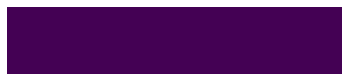

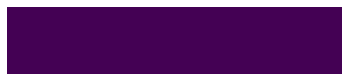

Datapiece25051


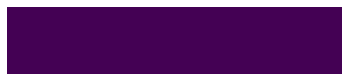

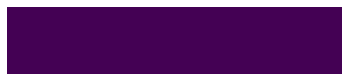

Datapiece25201


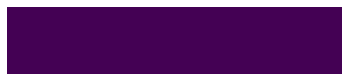

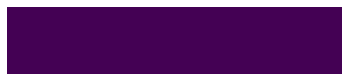

Datapiece25351


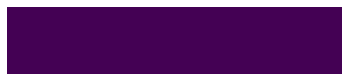

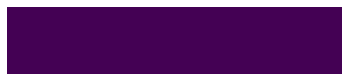

Datapiece25501


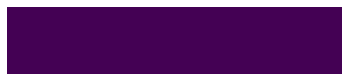

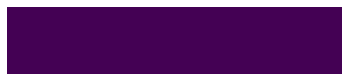

Datapiece25651


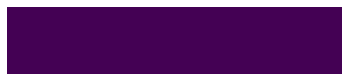

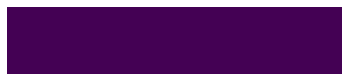

Datapiece25801


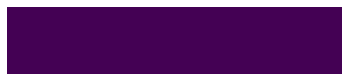

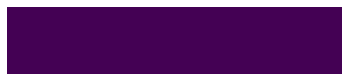

Datapiece25951


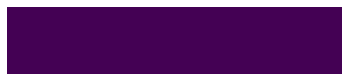

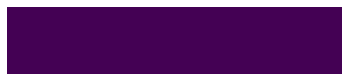

Datapiece26101


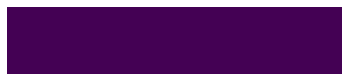

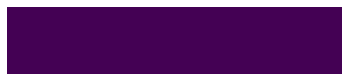

Datapiece26251


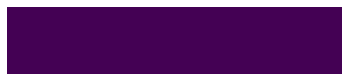

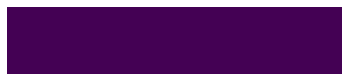

Datapiece26401


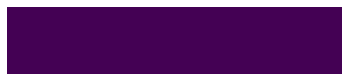

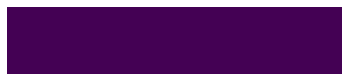

Datapiece26551


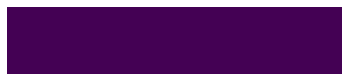

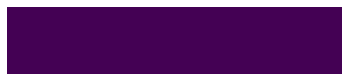

Datapiece26701


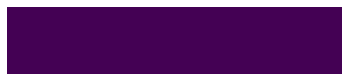

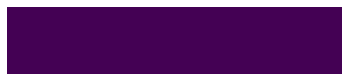

Datapiece26851


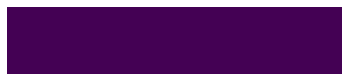

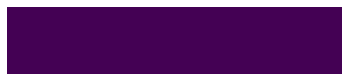

Datapiece27001


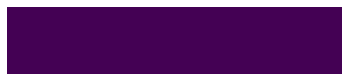

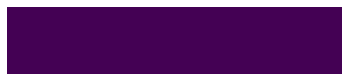

Datapiece27151


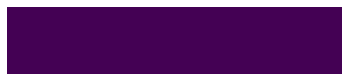

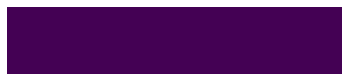

Datapiece27301


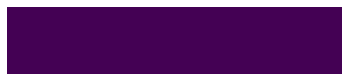

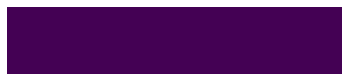

Datapiece27451


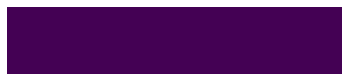

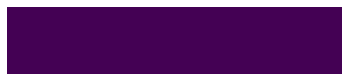

Datapiece27601


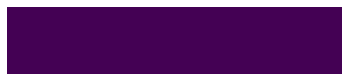

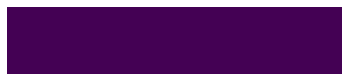

Datapiece27751


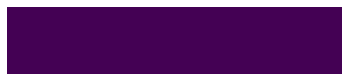

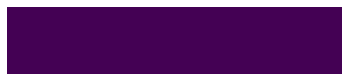

Datapiece27901


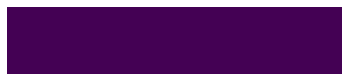

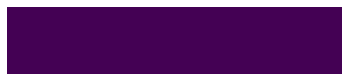

Datapiece28051


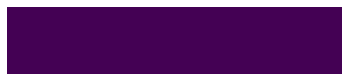

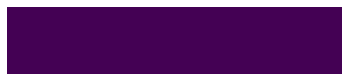

Datapiece28201


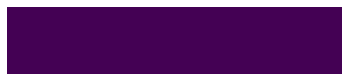

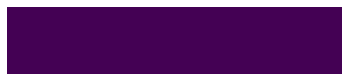

Datapiece28351


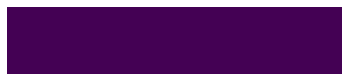

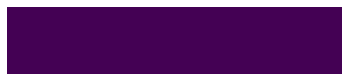

Datapiece28501


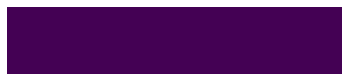

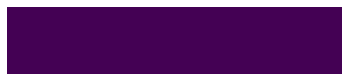

Datapiece28651


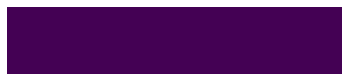

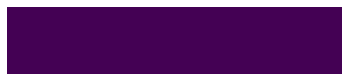

Datapiece28801


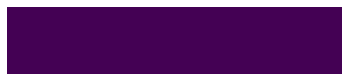

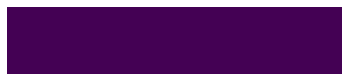

Datapiece28951


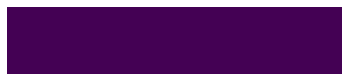

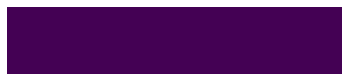

Datapiece29101


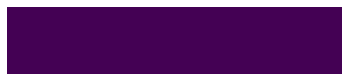

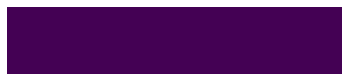

Datapiece29251


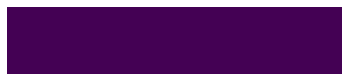

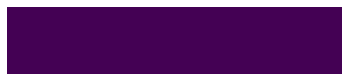

Datapiece29401


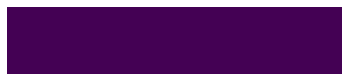

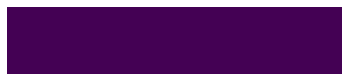

Datapiece29551


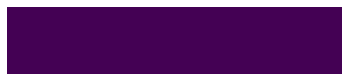

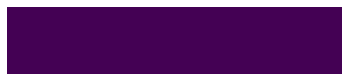

Datapiece29701


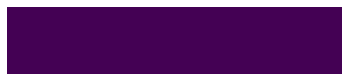

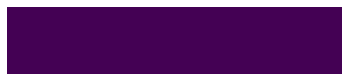

Datapiece29851


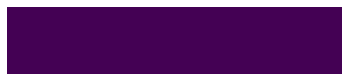

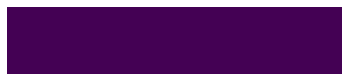

Datapiece30001


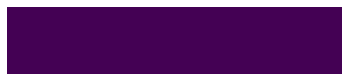

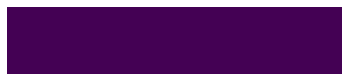

Datapiece30151


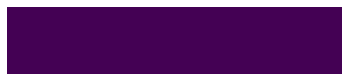

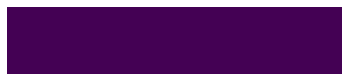

Datapiece30301


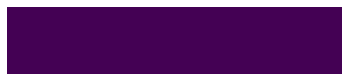

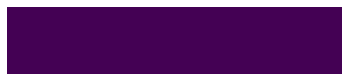

Datapiece30451


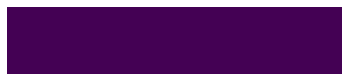

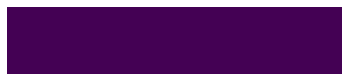

Datapiece30601


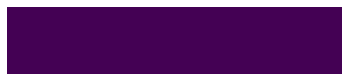

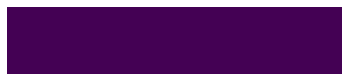

Datapiece30751


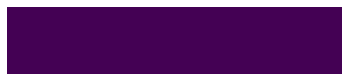

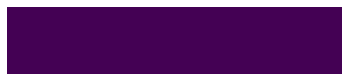

Datapiece30901


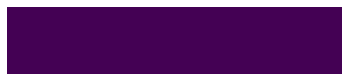

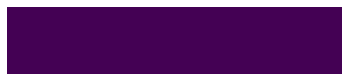

Datapiece31051


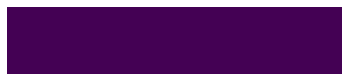

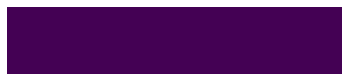

Datapiece31201


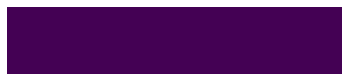

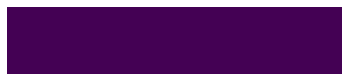

Datapiece31351


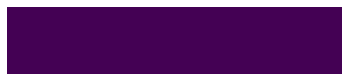

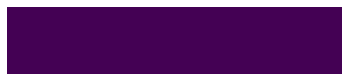

Datapiece31501


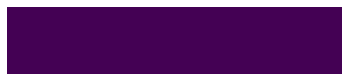

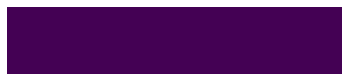

Datapiece31651


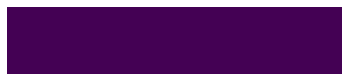

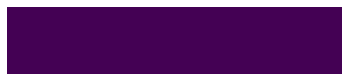

Datapiece31801


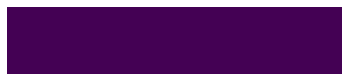

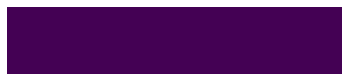

Datapiece31951


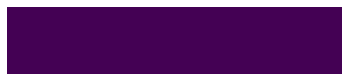

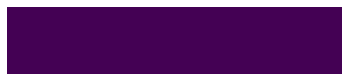

Datapiece32101


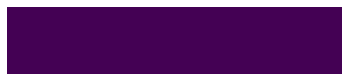

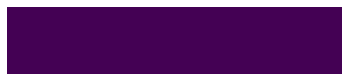

Datapiece32251


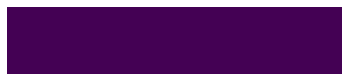

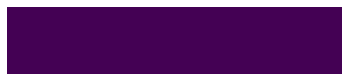

Datapiece32401


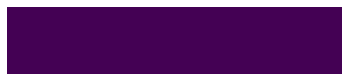

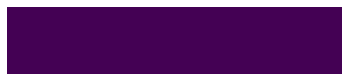

Datapiece32551


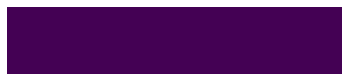

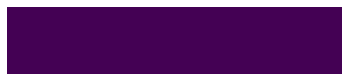

Datapiece32701


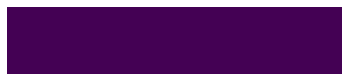

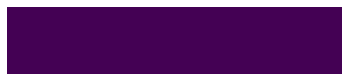

Datapiece32851


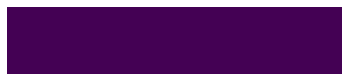

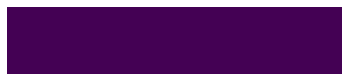

Datapiece33001


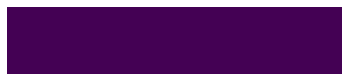

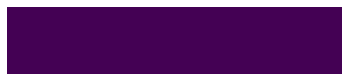

Datapiece33151


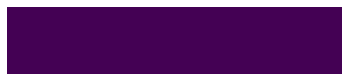

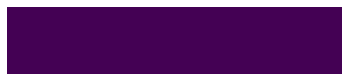

Datapiece33301


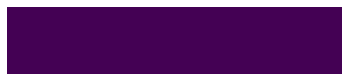

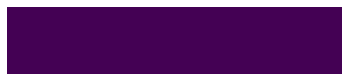

Datapiece33451


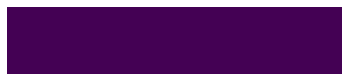

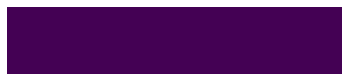

Datapiece33601


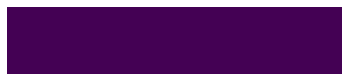

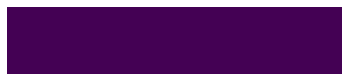

Datapiece33751


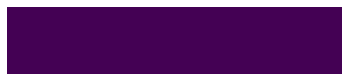

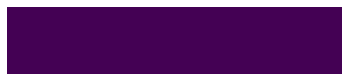

Datapiece33901


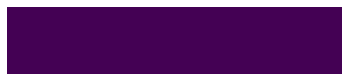

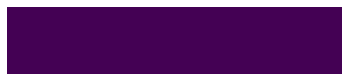

Datapiece34051


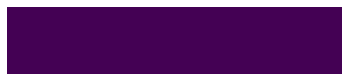

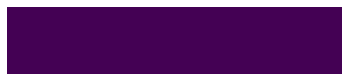

Datapiece34201


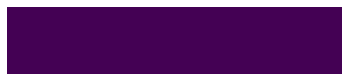

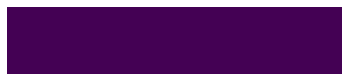

Datapiece34351


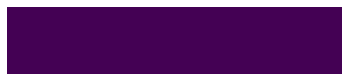

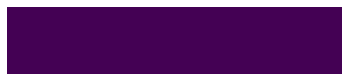

Datapiece34501


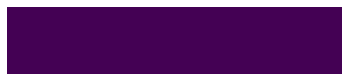

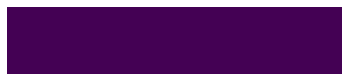

Datapiece34651


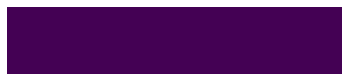

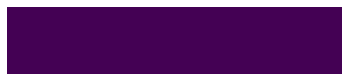

Datapiece34801


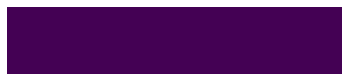

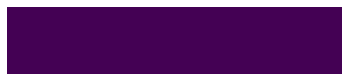

Datapiece34951


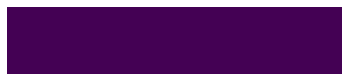

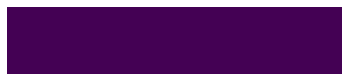

In [ ]:
for i in range (1,35000,150):
  print('Datapiece' + str(i))
  plt.axis('off')
  plt.imshow(train_imgs[i])
  plt.show()
  plt.axis('off')
  plt.imshow(train_imgs[i])
  plt.show()

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/debias_norm_training_dataset1', train_imgs, train_labs)

#**Split into Debias Arrays 25/75 Split**

**Split into new arrays for 25% solid 75% wave data**

In [ ]:
# Take data from 32993 to 65985 of dataset
debias_norm_dataset2 = dataset[32993:65985]
print(debias_norm_dataset2.shape)

(32992, 2)


**Split into train and test and validation data**



In [ ]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(debias_norm_dataset2)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(debias_norm_dataset2)

random.shuffle(debias_norm_dataset2)

for samples, labels in debias_norm_dataset2:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(26394, 2)
(4124, 2)
(2474, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/debias_norm_training_data2', training_data)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/debias_norm_val_data2', val_data)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/debias_norm_test_data2', test_data)

In [ ]:
train_imgs = []
train_labs = []

for i in range (0, 26394, 1):
  train_imgs.append(training_data[i][0])
  train_labs.append(training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(26394, 23, 115)
(26394, 11, 1)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/debias_norm_training_dataset2', train_imgs, train_labs)

#**Get rid of all empty images**

**Check which inputs/labels to remove**

In [ ]:
wavedataset = dataset[55000:63000] #THIS IS MOSTLY WAVES AS SEEN IN 'check which data is solid/wave' section
print(wavedataset.shape)

(8000, 2)


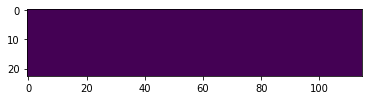

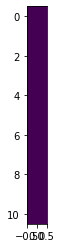

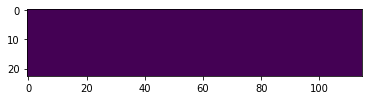

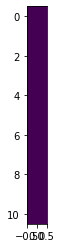

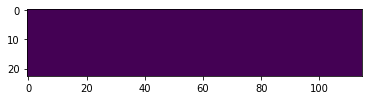

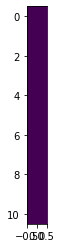

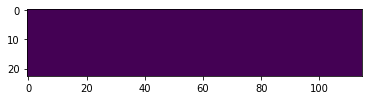

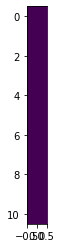

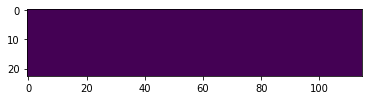

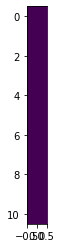

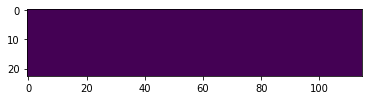

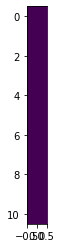

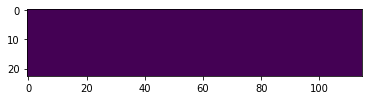

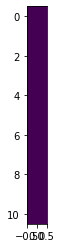

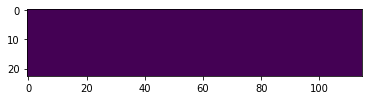

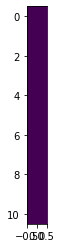

In [ ]:
for i in range (0, len(wavedataset), 1000):
  plt.imshow(wavedataset[i][0])
  plt.show()
  plt.imshow(wavedataset[i][1])
  plt.show()

**Split into test, train, val data**

In [ ]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(wavedataset)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(wavedataset)

random.shuffle(wavedataset)

for samples, labels in wavedataset:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(6400, 2)
(1000, 2)
(600, 2)


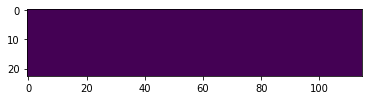

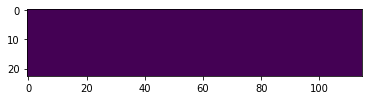

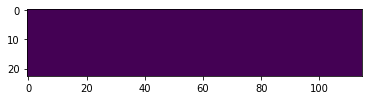

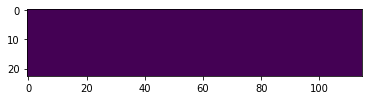

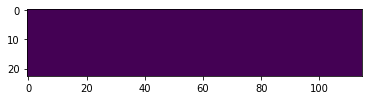

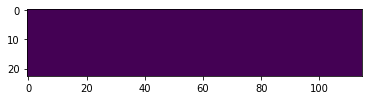

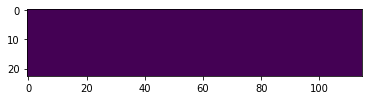

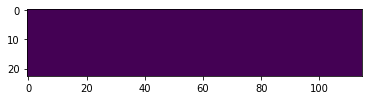

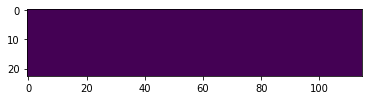

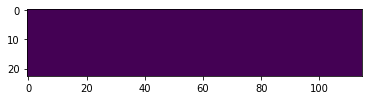

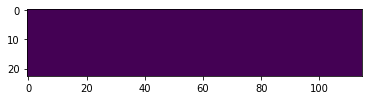

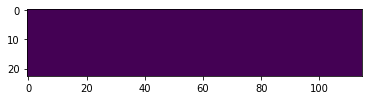

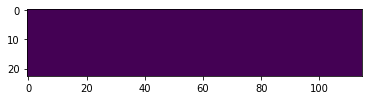

In [ ]:
for i in range (0, len(training_data), 500):
  plt.imshow(training_data[i][0])
  plt.show()

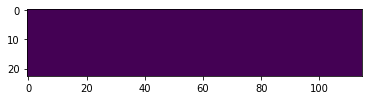

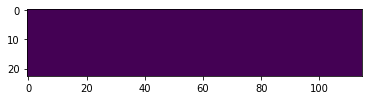

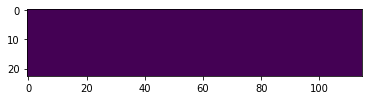

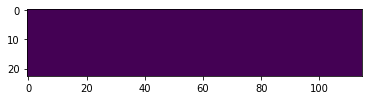

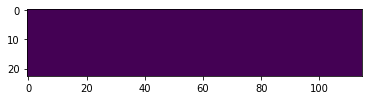

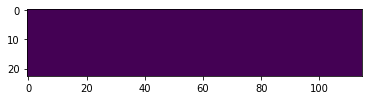

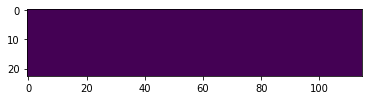

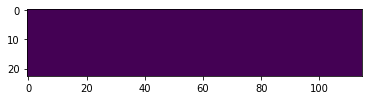

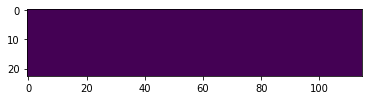

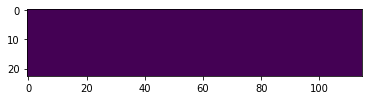

In [ ]:
for i in range (0, len(val_data), 100):
  plt.imshow(val_data[i][0])
  plt.show()

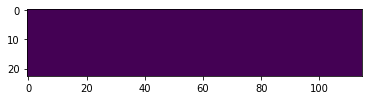

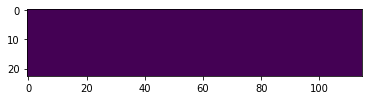

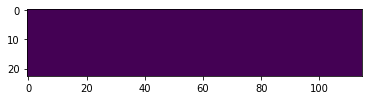

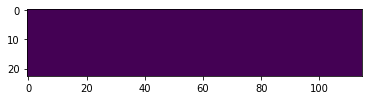

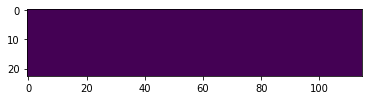

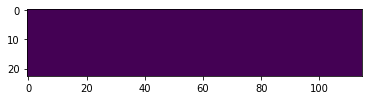

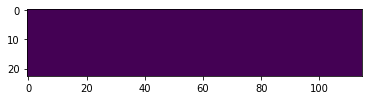

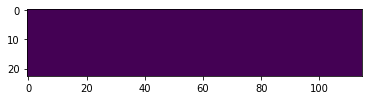

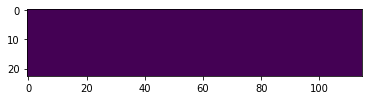

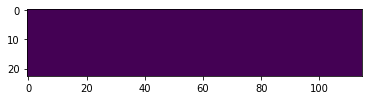

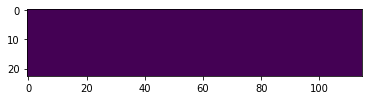

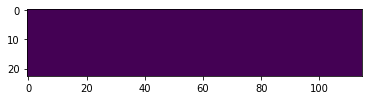

In [ ]:
for i in range (0, len(test_data), 50):
  plt.imshow(test_data[i][0])
  plt.show()

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/waves_training_data', training_data)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/waves_val_data', val_data)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/waves_test_data', test_data)

In [ ]:
train_imgs = []
train_labs = []

for i in range (0, len(training_data), 1):
  train_imgs.append(training_data[i][0])
  train_labs.append(training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(6400, 23, 115)
(6400, 11, 1)


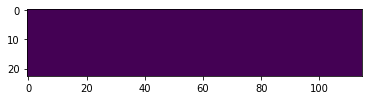

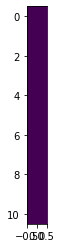

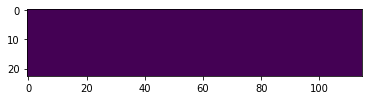

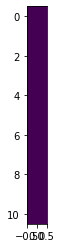

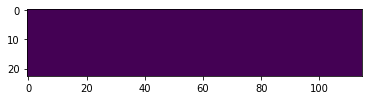

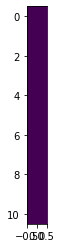

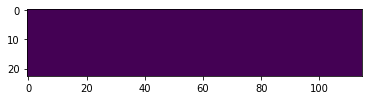

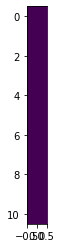

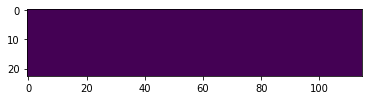

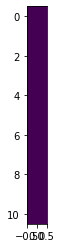

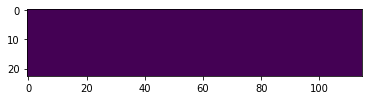

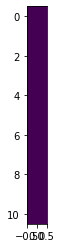

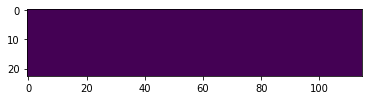

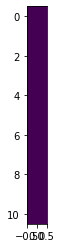

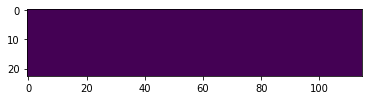

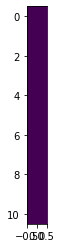

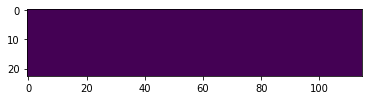

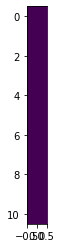

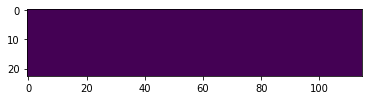

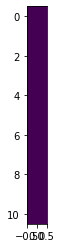

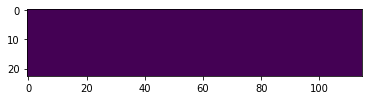

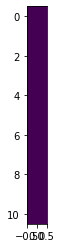

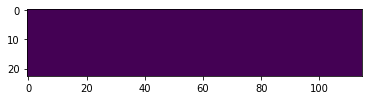

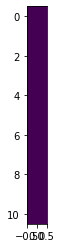

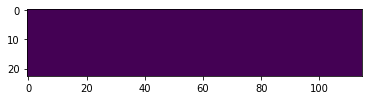

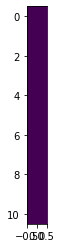

In [ ]:
for i in range (0, len(train_imgs), 500):
  plt.imshow(train_imgs[i])
  plt.show()
  plt.imshow(train_labs[i])
  plt.show()

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/waves_training_dataset', train_imgs, train_labs)

#**10% Purple Images**

In [ ]:
wavedataset = dataset[55000:63000] #THIS IS MOSTLY WAVES AS SEEN IN 'check which data is solid/wave' section
print(wavedataset.shape)

(8000, 2)


**Split into test, train, val data**

In [ ]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(wavedataset)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(wavedataset)

random.shuffle(wavedataset)

for samples, labels in wavedataset:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(6400, 2)
(1000, 2)
(600, 2)


In [ ]:
purpleset = dataset[0:640] #THIS IS JUST PURPLE
print(purpleset.shape)

(640, 2)


In [ ]:
#Add purple to training, val, testing
ten_training_data = np.concatenate((training_data, purpleset))
print(np.array(ten_training_data).shape)
#Random shuffle 
random.shuffle(ten_training_data)

(7040, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/ten_training_data', ten_training_data)

In [ ]:
purpleset = dataset[0:100] #THIS IS JUST PURPLE
print(purpleset.shape)

(100, 2)


In [ ]:
#Add purple to training, val, testing
ten_val_data = np.concatenate((val_data, purpleset))
print(np.array(ten_val_data).shape)
#Random shuffle 
random.shuffle(ten_val_data)

(1100, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/ten_val_data', ten_val_data)

In [ ]:
purpleset = dataset[0:60] #THIS IS JUST PURPLE
print(purpleset.shape)

(60, 2)


In [ ]:
#Add purple to training, val, testing
ten_test_data = np.concatenate((test_data, purpleset))
print(np.array(ten_test_data).shape)
#Random shuffle 
random.shuffle(ten_test_data)

(660, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/ten_test_data', ten_test_data)

In [ ]:
train_imgs = []
train_labs = []

for i in range (0, len(ten_training_data), 1):
  train_imgs.append(ten_training_data[i][0])
  train_labs.append(ten_training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(7040, 23, 115)
(7040, 11, 1)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/ten_training_dataset', train_imgs, train_labs)

#**15% Purple Images**

In [ ]:
wavedataset = dataset[55000:63000] #THIS IS MOSTLY WAVES AS SEEN IN 'check which data is solid/wave' section
print(wavedataset.shape)

(8000, 2)


**Split into test, train, val data**

In [ ]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(wavedataset)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(wavedataset)

random.shuffle(wavedataset)

for samples, labels in wavedataset:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(6400, 2)
(1000, 2)
(600, 2)


In [ ]:
purpleset = dataset[0:960] #THIS IS JUST PURPLE
print(purpleset.shape)

(960, 2)


In [ ]:
#Add purple to training, val, testing
fifteen_training_data = np.concatenate((training_data, purpleset))
print(np.array(fifteen_training_data).shape)
#Random shuffle 
random.shuffle(fifteen_training_data)

(7360, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fifteen_training_data', fifteen_training_data)

In [ ]:
purpleset = dataset[0:150] #THIS IS JUST PURPLE
print(purpleset.shape)

(150, 2)


In [ ]:
#Add purple to training, val, testing
fifteen_val_data = np.concatenate((val_data, purpleset))
print(np.array(fifteen_val_data).shape)
#Random shuffle 
random.shuffle(fifteen_val_data)

(1150, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fifteen_val_data', fifteen_val_data)

In [ ]:
purpleset = dataset[0:90] #THIS IS JUST PURPLE
print(purpleset.shape)

(90, 2)


In [ ]:
#Add purple to training, val, testing
fifteen_test_data = np.concatenate((test_data, purpleset))
print(np.array(fifteen_test_data).shape)
#Random shuffle 
random.shuffle(fifteen_test_data)

(690, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fifteen_test_data', fifteen_test_data)

In [ ]:
train_imgs = []
train_labs = []

for i in range (0, len(fifteen_training_data), 1):
  train_imgs.append(fifteen_training_data[i][0])
  train_labs.append(fifteen_training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(7360, 23, 115)
(7360, 11, 1)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fifteen_training_dataset', train_imgs, train_labs)

#**20% Purple Images**

In [13]:
wavedataset = dataset[55000:63000] #THIS IS MOSTLY WAVES AS SEEN IN 'check which data is solid/wave' section
print(wavedataset.shape)

(8000, 2)


**Split into test, train, val data**

In [14]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(wavedataset)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(wavedataset)

random.shuffle(wavedataset)

for samples, labels in wavedataset:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(6400, 2)
(1000, 2)
(600, 2)


In [15]:
purpleset = dataset[0:1280] #THIS IS JUST PURPLE
print(purpleset.shape)

(1280, 2)


In [16]:
#Add purple to training
twenty_training_data = np.concatenate((training_data, purpleset))
print(np.array(twenty_training_data).shape)
#Random shuffle 
random.shuffle(twenty_training_data)

(7680, 2)


In [17]:
for i in range (0, 7600, 100):
  print('Datapiece' + str(i))
  plt.axis('off')
  plt.imshow(twenty_training_data[i][0])
  plt.show()
  plt.axis('off')
  plt.imshow(twenty_training_data[i][1])
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [18]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/twenty_training_data', twenty_training_data)

In [19]:
purpleset = dataset[0:200] #THIS IS JUST PURPLE
print(purpleset.shape)

(200, 2)


In [20]:
#Add purple to val
twenty_val_data = np.concatenate((val_data, purpleset))
print(np.array(twenty_val_data).shape)
#Random shuffle 
random.shuffle(twenty_val_data)

(1200, 2)


In [21]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/twenty_val_data', twenty_val_data)

In [22]:
purpleset = dataset[0:120] #THIS IS JUST PURPLE
print(purpleset.shape)

(120, 2)


In [23]:
#Add purple to testing
twenty_test_data = np.concatenate((test_data, purpleset))
print(np.array(twenty_test_data).shape)
#Random shuffle 
random.shuffle(twenty_test_data)

(720, 2)


In [24]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/twenty_test_data', twenty_test_data)

In [25]:
train_imgs = []
train_labs = []

for i in range (0, len(twenty_training_data), 1):
  train_imgs.append(twenty_training_data[i][0])
  train_labs.append(twenty_training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(7680, 23, 115)
(7680, 11, 1)


In [26]:
print(np.max(train_imgs))

1.0


In [27]:
for i in range (1,5000,50):
  print('Datapiece' + str(i))
  plt.axis('off')
  plt.imshow(train_imgs[i])
  plt.show()
  plt.axis('off')
  plt.imshow(train_imgs[i])
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [28]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/twenty_training_dataset', train_imgs, train_labs)

#**30% Purple Images**

In [ ]:
wavedataset = dataset[55000:63000] #THIS IS MOSTLY WAVES AS SEEN IN 'check which data is solid/wave' section
print(wavedataset.shape)

(8000, 2)


**Split into test, train, val data**

In [ ]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(wavedataset)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(wavedataset)

random.shuffle(wavedataset)

for samples, labels in wavedataset:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(6400, 2)
(1000, 2)
(600, 2)


In [ ]:
purpleset = dataset[0:1920] #THIS IS JUST PURPLE
print(purpleset.shape)

(1920, 2)


In [ ]:
#Add purple to training
thirty_training_data = np.concatenate((training_data, purpleset))
print(np.array(thirty_training_data).shape)
#Random shuffle 
random.shuffle(thirty_training_data)

(8320, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/thirty_training_data', thirty_training_data)

In [ ]:
purpleset = dataset[0:300] #THIS IS JUST PURPLE
print(purpleset.shape)

(300, 2)


In [ ]:
#Add purple to val
thirty_val_data = np.concatenate((val_data, purpleset))
print(np.array(thirty_val_data).shape)
#Random shuffle 
random.shuffle(thirty_val_data)

(1300, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/thirty_val_data', thirty_val_data)

In [ ]:
purpleset = dataset[0:180] #THIS IS JUST PURPLE
print(purpleset.shape)

(180, 2)


In [ ]:
#Add purple to testing
thirty_test_data = np.concatenate((test_data, purpleset))
print(np.array(thirty_test_data).shape)
#Random shuffle 
random.shuffle(thirty_test_data)

(780, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/thirty_test_data', thirty_test_data)

In [ ]:
train_imgs = []
train_labs = []

for i in range (0, len(thirty_training_data), 1):
  train_imgs.append(thirty_training_data[i][0])
  train_labs.append(thirty_training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(8320, 23, 115)
(8320, 11, 1)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/thirty_training_dataset', train_imgs, train_labs)

#**40% Purple Images**

In [ ]:
wavedataset = dataset[55000:63000] #THIS IS MOSTLY WAVES AS SEEN IN 'check which data is solid/wave' section
print(wavedataset.shape)

(8000, 2)


**Split into test, train, val data**

In [ ]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(wavedataset)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(wavedataset)

random.shuffle(wavedataset)

for samples, labels in wavedataset:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(6400, 2)
(1000, 2)
(600, 2)


In [ ]:
purpleset = dataset[0:2560] #THIS IS JUST PURPLE
print(purpleset.shape)

(2560, 2)


In [ ]:
#Add purple to training
fourty_training_data = np.concatenate((training_data, purpleset))
print(np.array(fourty_training_data).shape)
#Random shuffle 
random.shuffle(fourty_training_data)

(8960, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fourty_training_data', fourty_training_data)

In [ ]:
purpleset = dataset[0:400] #THIS IS JUST PURPLE
print(purpleset.shape)

(400, 2)


In [ ]:
#Add purple to val
fourty_val_data = np.concatenate((val_data, purpleset))
print(np.array(fourty_val_data).shape)
#Random shuffle 
random.shuffle(fourty_val_data)

(1400, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fourty_val_data', fourty_val_data)

In [ ]:
purpleset = dataset[0:240] #THIS IS JUST PURPLE
print(purpleset.shape)

(240, 2)


In [ ]:
#Add purple to testing
fourty_test_data = np.concatenate((test_data, purpleset))
print(np.array(fourty_test_data).shape)
#Random shuffle 
random.shuffle(fourty_test_data)

(840, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fourty_test_data', fourty_test_data)

In [ ]:
train_imgs = []
train_labs = []

for i in range (0, len(fourty_training_data), 1):
  train_imgs.append(fourty_training_data[i][0])
  train_labs.append(fourty_training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(8960, 23, 115)
(8960, 11, 1)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fourty_training_dataset', train_imgs, train_labs)

#**50% Purple Images**

In [ ]:
wavedataset = dataset[55000:63000] #THIS IS MOSTLY WAVES AS SEEN IN 'check which data is solid/wave' section
print(wavedataset.shape)

(8000, 2)


**Split into test, train, val data**

In [ ]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(wavedataset)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(wavedataset)

random.shuffle(wavedataset)

for samples, labels in wavedataset:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(6400, 2)
(1000, 2)
(600, 2)


In [ ]:
purpleset = dataset[0:3200] #THIS IS JUST PURPLE
print(purpleset.shape)

(3200, 2)


In [ ]:
#Add purple to training
fifty_training_data = np.concatenate((training_data, purpleset))
print(np.array(fifty_training_data).shape)
#Random shuffle 
random.shuffle(fifty_training_data)

(9600, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fifty_training_data',fifty_training_data)

In [ ]:
purpleset = dataset[0:500] #THIS IS JUST PURPLE
print(purpleset.shape)

(500, 2)


In [ ]:
#Add purple to val
fifty_val_data = np.concatenate((val_data, purpleset))
print(np.array(fifty_val_data).shape)
#Random shuffle 
random.shuffle(fifty_val_data)

(1500, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fifty_val_data', fifty_val_data)

In [ ]:
purpleset = dataset[0:300] #THIS IS JUST PURPLE
print(purpleset.shape)

(300, 2)


In [ ]:
#Add purple to testing
fifty_test_data = np.concatenate((test_data, purpleset))
print(np.array(fifty_test_data).shape)
#Random shuffle 
random.shuffle(fifty_test_data)

(900, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fifty_test_data', fifty_test_data)

In [ ]:
train_imgs = []
train_labs = []

for i in range (0, len(fifty_training_data), 1):
  train_imgs.append(fifty_training_data[i][0])
  train_labs.append(fifty_training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(9600, 23, 115)
(9600, 11, 1)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/fifty_training_dataset', train_imgs, train_labs)

#**100% Purple Images**

In [ ]:
wavedataset = dataset[55000:63000] #THIS IS MOSTLY WAVES AS SEEN IN 'check which data is solid/wave' section
print(wavedataset.shape)

(8000, 2)


**Split into test, train, val data**

In [ ]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(wavedataset)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(wavedataset)

random.shuffle(wavedataset)

for samples, labels in wavedataset:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(6400, 2)
(1000, 2)
(600, 2)


In [ ]:
purpleset = dataset[0:6400] #THIS IS JUST PURPLE
print(purpleset.shape)

(6400, 2)


In [ ]:
#Add purple to training
hundred_training_data = np.concatenate((training_data, purpleset))
print(np.array(hundred_training_data).shape)
#Random shuffle 
random.shuffle(hundred_training_data)

(12800, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/hundred_training_data',hundred_training_data)

In [ ]:
purpleset = dataset[0:1000] #THIS IS JUST PURPLE
print(purpleset.shape)

(1000, 2)


In [ ]:
#Add purple to val
hundred_val_data = np.concatenate((val_data, purpleset))
print(np.array(hundred_val_data).shape)
#Random shuffle 
random.shuffle(hundred_val_data)

(2000, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/hundred_val_data', hundred_val_data)

In [ ]:
purpleset = dataset[0:600] #THIS IS JUST PURPLE
print(purpleset.shape)

(600, 2)


In [ ]:
#Add purple to testing
hundred_test_data = np.concatenate((test_data, purpleset))
print(np.array(hundred_test_data).shape)
#Random shuffle 
random.shuffle(hundred_test_data)

(1200, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/hundred_test_data', hundred_test_data)

In [ ]:
train_imgs = []
train_labs = []

for i in range (0, len(hundred_training_data), 1):
  train_imgs.append(hundred_training_data[i][0])
  train_labs.append(hundred_training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(12800, 23, 115)
(12800, 11, 1)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/hundred_training_dataset', train_imgs, train_labs)

#**JUST PURPLE**

In [ ]:
wavedataset = dataset[0:6400] #This is just solid purple
print(wavedataset.shape)

(6400, 2)


**Split into test, train, val data**

In [ ]:
# Training data is 80% of whole dataset
# Validation and test data together are 20% of the whole dataset 
# Validation data = 12.5% - Test data = 7.5% 

training_data = []
val_data = []
test_data = []

num_tot = len(wavedataset)
trainTotest = 12.5
trainToVal = 7.5

val_num = int(num_tot * trainTotest)/100
test_num = int(num_tot * trainToVal)/100

a = 0
n = len(wavedataset)

random.shuffle(wavedataset)

for samples, labels in wavedataset:

    if a >= 0 and  a < (num_tot - val_num - test_num):
        training_data.append([samples, labels])

    if a >= (num_tot - val_num - test_num) and a < (num_tot - test_num):
        val_data.append(([samples, labels]))

    if a >= (num_tot - test_num):
        test_data.append([samples, labels])

    a+=1
        
print(np.array(training_data).shape)
print(np.array(val_data).shape)
print(np.array(test_data).shape)

(5120, 2)
(800, 2)
(480, 2)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/purple_training_data',training_data)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/purple_val_data', val_data)

In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/purple_test_data', test_data)

In [ ]:
train_imgs = []
train_labs = []

for i in range (0, len(training_data), 1):
  train_imgs.append(training_data[i][0])
  train_labs.append(training_data[i][1])

train_imgs = np.array(train_imgs)
train_labs = np.array(train_labs)

print(train_imgs.shape)
print(train_labs.shape)

(5120, 23, 115)
(5120, 11, 1)


In [ ]:
np.savez_compressed('/content/drive/My Drive/ML_Ultrasound_Project/UROPdata/purple_training_dataset', train_imgs, train_labs)